# Cardiovascular Diseases (CVDs) 
### Cardiovascular Diseases are a group of disorders that include diseased vessels, structural problems, blood clots, etc. According to the World Health Organization (WHO), CVDs account for the leading cause of death globally. Approximately 17.9 million people die globally from CVDs each year and according to the CDC approximately 877,500 Americans annually comprise this number. This data exploration is very personal to me, as my father passed away when I was 26, in 2019 from a CVD. 
### Some CVD Leading Risk Factors are: 
* High Blood Pressure (130/80 mm Hg or higher)
* High LDL Cholesterol levels (which can double a person's risk of heart disease)
* Smoking and secondhand smoke exposure 
* Obesity and Physical Inactivity

### The purpose of this project, is to analyze different features and their contribution to CVDs. 

### This specific dataset was chosen because it was messy and I was interested in these features with binary values good for classification.  
### Dataset 1 comprises three types of input feature categories: 
1. Objective which is factual information;
2. Examination which are the results of medical examination;
3. Subjective which is information given by the patient.

### We will create another column, BMI in this dataset to look at obesity in terms of weight and height.
* According to the National Institute of Health (NIH) higher BMI leads to a higher risk of heart disease. 
* A BMI greater than 25 is considered overweight and greater than 30 is considered obese. 


## EXPLAIN AND INGEST YOUR DATASET 

In [1873]:
# Import Libraries 

# Generic Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn import tree, metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from mixed_naive_bayes import MixedNB

In [1874]:
# Ingest dataset
# The dataset consists of 70,000 records of patients data
# Source: https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset
cvd_df = pd.read_csv("cardio_train.csv", delimiter=';')
cvd_df


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [1875]:
cvd_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## About the Data
* From the imported dataset, we see that there are 70,000 observations and 11 features of interest (not including id and target). 

Features: 
| Feature name | Description | Datatype |
| --- | --- | --- |
| id | corresponds to the id of the observation | int |
| age | Age is an Objective Feature in days | int |
| height | Height is an Objective Feature | int (cm) |
| weight | Weight is an Objective Feature | float (kg) |
| gender | Gender is an Objective Feature | categorical code int 1: women, 2: men|
| ap_hi | Systolic blood pressure is an Examination Feature | int |
| ap_lo | Diastolic blood pressure is an Examination Feature | int |
| cholesterol | Cholesterol is an Examination Feature | int 1: normal, 2: above normal, 3: well above normal |
| gluc | Glucose is an Examination Feature |int 1: normal, 2: above normal, 3: well above normal |
| smoke | Smoking is Subjective Feature | int binary - 0: no, 1: yes |
| alco | Alcohol intake is an Subjective Feature | int binary - 0: no, 1: yes |
| active | Physical activity is an Subjective Feature | int binary - 0: no, 1: yes|
| Target Variable - cardio | Presence or absence of cardiovascular disease | int binary - 0: no, 1: yes |

### Step 2: Explore the datasets

In this step, you should explore what is present in the data and how the data is organized. 

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)? 
* What will you need to do to clean and/or transform the raw data for analysis?

You can also visually explore the datasets and explain your findings, specifically,

* How are the data distributed? 
* What are some common trends?
* What are the relationships between variables in your dataset?

# PERFORM AND EXPLAIN YOUR EXPLORATORY ANALYSIS IN THIS SECTION

In [1876]:
# Checking for null data
cvd_df.isnull().sum()


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [1877]:
# Are there any duplicate?
cvd_df[cvd_df.duplicated(keep=False)]


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [1878]:
cvd_df.columns


Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [1879]:
# Ensuring that certain columns () do not contain zero, as that would not make sense. 
nonzero_df = cvd_df[[ 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc']]
nonzero_df
for column in nonzero_df: 
    if (nonzero_df[column] == 0).all():
        print('all')
        

In [1880]:
# Checking if there are any values less than zero 
(cvd_df["id"] < 0).any() | (cvd_df["age"] < 0).any() |(cvd_df["gender"] < 0).any() | (cvd_df["height"] < 0).any() | (cvd_df["weight"] < 0).any() | (cvd_df["ap_hi"] < 0).any() | (cvd_df["ap_lo"] < 0).any() | (cvd_df["cholesterol"] < 0).any()| (cvd_df["gluc"] < 0).any()|(cvd_df["smoke"] < 0).any() | (cvd_df["alco"] < 0).any() | (cvd_df["active"] < 0).any() | (cvd_df["cardio"] < 0).any()

True

In [1881]:
# Getting the row indices of these below zero values (outliers)
cvd_df[(cvd_df < 0).any(axis=1)].index


Int64Index([4607, 16021, 20536, 23988, 25240, 35040, 46627, 60106], dtype='int64')

In [1882]:
# Which rows are below zero? 
neg_df = cvd_df.iloc[4607], cvd_df.iloc[16021], cvd_df.iloc[23988], cvd_df.iloc[25240], cvd_df.iloc[35040], cvd_df.iloc[46627],cvd_df.iloc[60106]
neg_df = pd.DataFrame(neg_df)
neg_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
4607,6525.0,15281.0,1.0,165.0,78.0,-100.0,80.0,2.0,1.0,0.0,0.0,1.0,0.0
16021,22881.0,22108.0,2.0,161.0,90.0,-115.0,70.0,1.0,1.0,0.0,0.0,1.0,0.0
23988,34295.0,18301.0,1.0,162.0,74.0,-140.0,90.0,1.0,1.0,0.0,0.0,1.0,1.0
25240,36025.0,14711.0,2.0,168.0,50.0,-120.0,80.0,2.0,1.0,0.0,0.0,0.0,1.0
35040,50055.0,23325.0,2.0,168.0,59.0,-150.0,80.0,1.0,1.0,0.0,0.0,1.0,1.0
46627,66571.0,23646.0,2.0,160.0,59.0,-120.0,80.0,1.0,1.0,0.0,0.0,0.0,0.0
60106,85816.0,22571.0,1.0,167.0,74.0,15.0,-70.0,1.0,1.0,0.0,0.0,1.0,1.0


* Systolic and Diastolic measurements cannot be negative numbers

In [1883]:
# Dropping the rows with Systolic and Diastolic below 0 because this does not make sense
cvd_df.drop(cvd_df.index[[4607, 16021, 20536, 23988, 25240, 35040, 46627, 60106]], inplace=True)


In [1884]:
# Looking for cases where Diastolic is higher than Systolic because that is impossible
(cvd_df["ap_lo"] > cvd_df["ap_hi"]).any()


True

In [1885]:
# Getting rid of all of the BP outliers (95% confidence interval)
cvd_df.drop(cvd_df[(cvd_df['ap_lo'] > cvd_df['ap_lo'].quantile(0.975)) | (cvd_df['ap_lo'] < cvd_df['ap_lo'].quantile(0.025))].index,inplace=True)
cvd_df.drop(cvd_df[(cvd_df['ap_hi'] > cvd_df['ap_hi'].quantile(0.975)) | (cvd_df['ap_hi'] < cvd_df['ap_hi'].quantile(0.025))].index,inplace=True)


In [1886]:
cvd_df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [1887]:
cvd_df = cvd_df.drop(columns = 'id') # the id has no real relevance 


In [1888]:
# Transforming age into years since it is currently in days. 
cvd_df['age'] = (cvd_df['age']/365).round() 
cvd_df


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69994,58.0,1,165,80.0,150,80,1,1,0,0,1,1
69995,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


In [1889]:
# Looking at Descriptive statistics
cvd_df.describe()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,65572.000000,65572.000000,65572.000000,65572.000000,65572.000000,65572.000000,65572.000000,65572.000000,65572.000000,65572.000000,65572.000000,65572.000000
mean,53.329470,1.349585,164.429406,74.015791,125.843943,81.074529,1.358110,1.223251,0.087415,0.052614,0.803590,0.489248
std,6.760712,0.476843,8.152002,14.070119,13.900369,8.324192,0.675215,0.570305,0.282445,0.223263,0.397285,0.499888
min,30.000000,1.000000,55.000000,11.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,160.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [1890]:
# Finding and removing outliers of age, weight, and height 
cvd_df.drop(cvd_df[(cvd_df['age'] > cvd_df['age'].quantile(0.975)) | (cvd_df['age'] < cvd_df['age'].quantile(0.025))].index,inplace=True)
cvd_df.drop(cvd_df[(cvd_df['weight'] > cvd_df['weight'].quantile(0.975)) | (cvd_df['weight'] < cvd_df['weight'].quantile(0.025))].index,inplace=True)
cvd_df.drop(cvd_df[(cvd_df['height'] > cvd_df['height'].quantile(0.975)) | (cvd_df['height'] < cvd_df['height'].quantile(0.025))].index,inplace=True)

cvd_df.describe()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,59482.000000,59482.000000,59482.000000,59482.000000,59482.000000,59482.000000,59482.000000,59482.000000,59482.000000,59482.000000,59482.000000,59482.000000
mean,53.360580,1.346575,164.547661,73.436054,125.789129,81.063263,1.352073,1.220874,0.085589,0.051679,0.803722,0.488719
std,6.641497,0.475883,6.830010,11.621351,13.754454,8.234410,0.671076,0.568387,0.279758,0.221381,0.397184,0.499877
min,40.000000,1.000000,150.000000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,1.000000,160.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,169.000000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,180.000000,106.000000,160.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


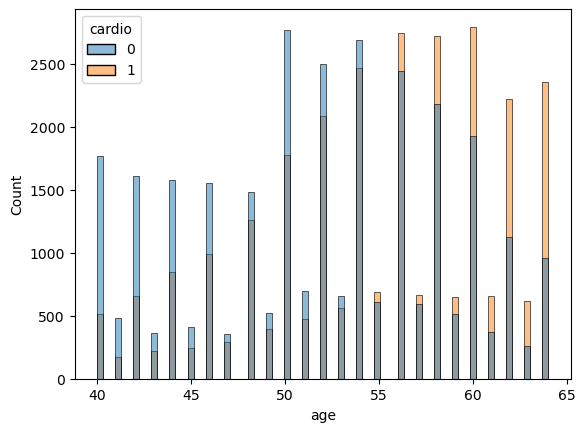

In [1891]:
# Creating a stacked barplot
sns.histplot(data=cvd_df,x="age",hue="cardio",bins=75)
plt.show()


* We can see that as the age of an individual increases up having a positive CVD event increases.

In [1892]:
# Converting height into m from cm
cvd_df['height'] = cvd_df['height']/100 
cvd_df


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0
1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1
2,52.0,1,1.65,64.0,130,70,3,1,0,0,0,1
3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1
4,48.0,1,1.56,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69993,54.0,1,1.72,70.0,130,90,1,1,0,0,1,1
69994,58.0,1,1.65,80.0,150,80,1,1,0,0,1,1
69995,53.0,2,1.68,76.0,120,80,1,1,1,0,1,0
69998,61.0,1,1.63,72.0,135,80,1,2,0,0,0,1


In [1893]:
# Sometimes the ratio of height to weight can be easier to understand as BMI. 
# A high BMI can indicate high body fat. 
# BMI = weight (kg)/(height (m))^2
cvd_df['bmi'] = cvd_df['weight']/(cvd_df['height']**2)
cvd_df


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1,34.927679
2,52.0,1,1.65,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1,28.710479
4,48.0,1,1.56,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,54.0,1,1.72,70.0,130,90,1,1,0,0,1,1,23.661439
69994,58.0,1,1.65,80.0,150,80,1,1,0,0,1,1,29.384757
69995,53.0,2,1.68,76.0,120,80,1,1,1,0,1,0,26.927438
69998,61.0,1,1.63,72.0,135,80,1,2,0,0,0,1,27.099251


### According to the CDC BMI is categorized by the following: 
	 
| BMI| Weight Status | Category
| --- | --- | --- | 
|Below  18.5 | Underweight| 1 |
|18.5 – 24.9 | Healthy Weight| 2 |
|25.0 – 29.9 | Overweight | 3 |
|30.0 and Above | Obesity |4 |

In [1894]:
# Creating bmi categories for KDE plot
cvd_df.loc[(cvd_df.bmi <= 18.5), 'bmi'] = 1
cvd_df.loc[(cvd_df.bmi > 18.5) & (cvd_df.bmi < 25), 'bmi'] = 2
cvd_df.loc[(cvd_df.bmi >= 25) & (cvd_df.bmi < 30), 'bmi'] = 3
cvd_df.loc[(cvd_df.bmi >= 30), 'bmi'] = 4

# I also will be using these categories later during Bernoulli Distribution. 

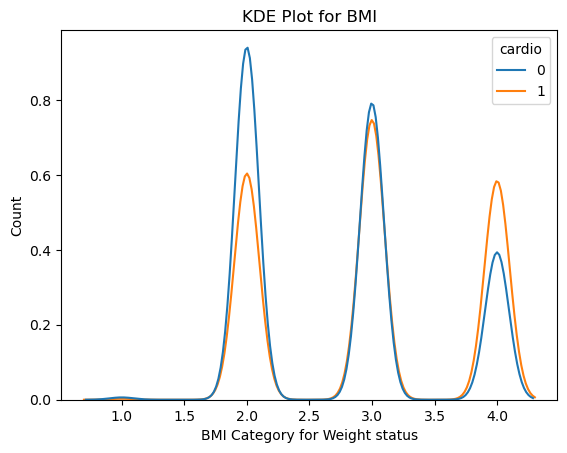

In [1895]:
# Plotting Probability Density Function bmi for cvd present and not present
sns.kdeplot(data=cvd_df, x="bmi", hue='cardio')
plt.ylabel("Count")
plt.xlabel("BMI Category for Weight status")
plt.title("KDE Plot for BMI")
plt.show()


* From the KDE plot, we can see that the risk of CVD increases (orange line - event is present) with increased BMI. 

,cardio
age,0.232756
gender,-0.004449
height,-0.030572
weight,0.158621
ap_hi,0.427605
ap_lo,0.320799
cholesterol,0.216318
gluc,0.085397
smoke,-0.023331
alco,-0.014482


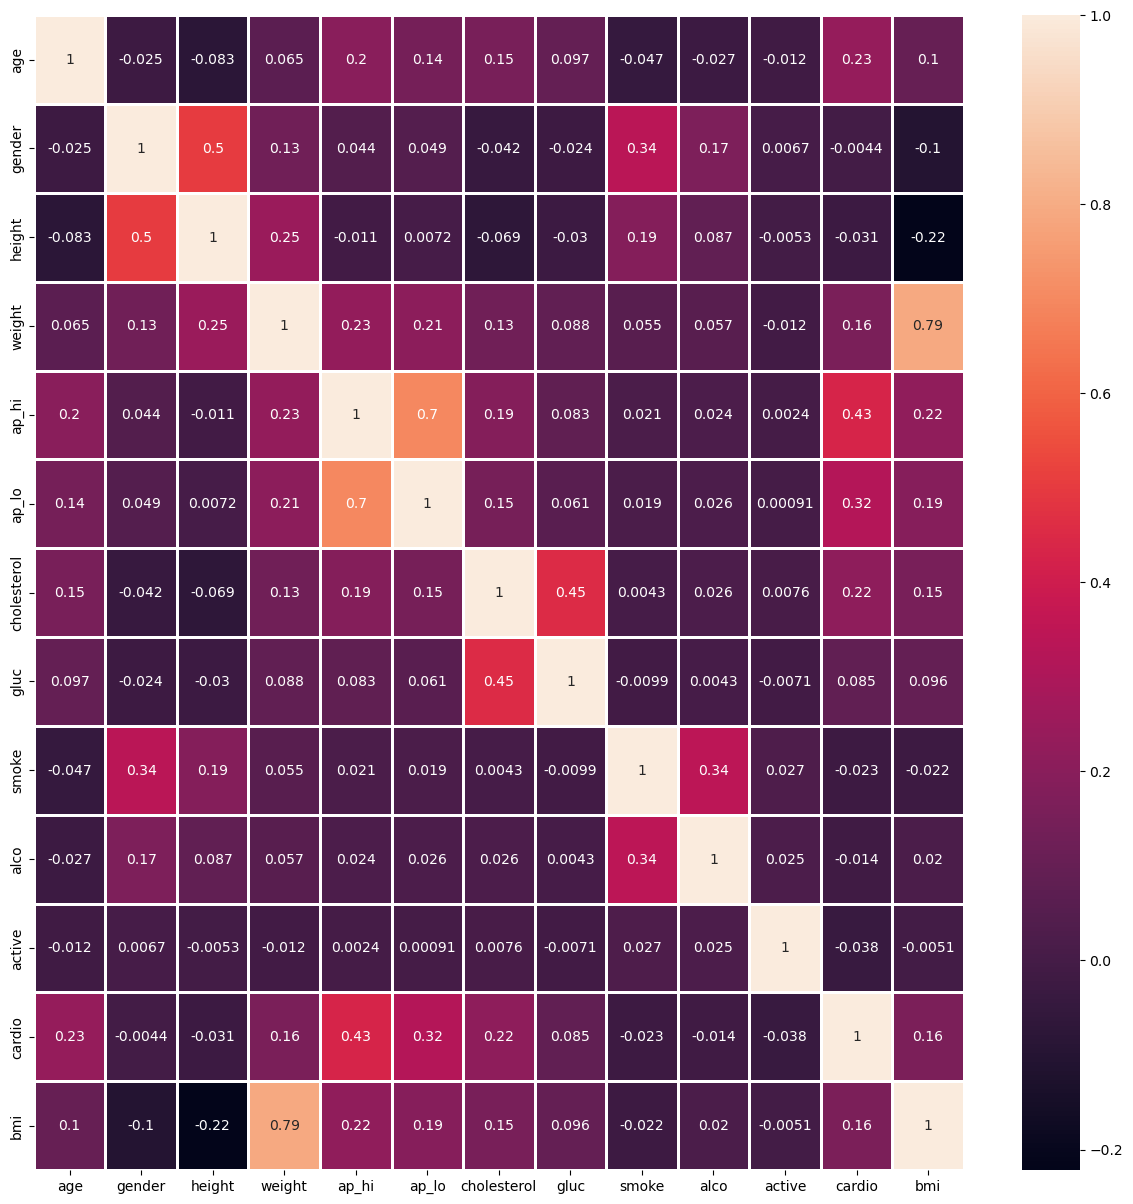

In [1896]:
# Visualizing Correlations - the mutual relationship between cardio and all other features
plt.figure(figsize=(15,15))
# Calculating Pearson corraltions for cardio
correlation = cvd_df.corr()['cardio']
correlation = pd.DataFrame(correlation)
# Looking at full heatmap 
corr = cvd_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, linewidths=1);
correlation


### Looking at Blood Pressure
* According to the National Institute of Health (NIH), Systolic Blood Pressure and Diastolic Blood Pressure display a linear relationship shown by the systolic-diastolic slope. 

<Axes: xlabel='ap_hi', ylabel='ap_lo'>

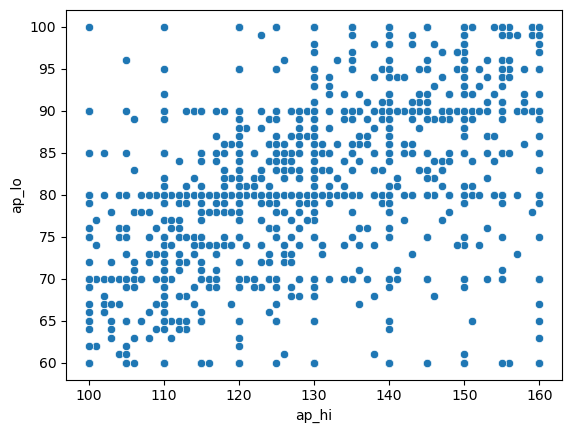

In [1897]:
sns.scatterplot(data=cvd_df, x="ap_hi", y="ap_lo")


# 2nd Dataset to compare against
### I chose this dataset because it has more numerical information pertaining to the heart. 
## About the Data
* From the imported dataset, we can see that there are 1024 observations and 13 features of interest (not including the target). Which is less data than the last dataset. 

Features: 
| Feature name | Description | Datatype |
| --- | --- | --- |
| age | Age of case | int - years|
| sex | Gender | categorical code int 1: women, 0: men|
|cp|Chest Pain |categorical code int 0-3 increasing with pain|
|trestbps |resting blood pressure|int - mmHg|
|chol|serum cholestoral|int - mg/dl|
|fbs|fasting blood sugar |int - 1 = true; 0 = false|
|restecg|resting electrocardiographic results|int - 0,1,2|
|thalach|maximum heart rate achieved|int|
|exang|exercise induced angina|int - 1 = yes; 0 = no|
|oldpeak|ST depression induced by exercise relative to rest|float |
|slope|the slope of the peak exercise ST segment|int|
|ca|number of major vessels (0-3) colored by flourosopy|int - 0-3 |
|thal|Thalassemia (blood disorder which causes cardiac iron accumulation)|int - 1 = normal; 2 = fixed defect; 3= reversable defect|
|target|Presence or absence of cardiovascular disease|int binary - 0: no, 1: yes |

In [1898]:
# Ingest dataset 
# This data set dates from 1988 and consists of four databases: 
# Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them.
# Source: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data
cvd_df_2 = pd.read_csv("heart.csv", delimiter=',')
cvd_df_2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [1899]:
cvd_df_2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [1900]:
cvd_df_2.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [1901]:
# # Checking for null data
cvd_df_2.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [1902]:
# Getting rid of outliers from age, resting blood pressure, cholesterol level, maximum heart rate achieved,
# This was a much cleaner dataset but outliers did exist. 
cvd_df_2.drop(cvd_df_2[(cvd_df_2['age'] > cvd_df_2['age'].quantile(0.975)) | (cvd_df_2['age'] < cvd_df_2['age'].quantile(0.025))].index,inplace=True)
cvd_df_2.drop(cvd_df_2[(cvd_df_2['trestbps'] > cvd_df_2['trestbps'].quantile(0.975)) | (cvd_df_2['trestbps'] < cvd_df_2['trestbps'].quantile(0.025))].index,inplace=True)
cvd_df_2.drop(cvd_df_2[(cvd_df_2['chol'] > cvd_df_2['chol'].quantile(0.975)) | (cvd_df_2['chol'] < cvd_df_2['chol'].quantile(0.025))].index,inplace=True)
cvd_df_2.drop(cvd_df_2[(cvd_df_2['thalach'] > cvd_df_2['thalach'].quantile(0.975)) | (cvd_df_2['thalach'] < cvd_df_2['thalach'].quantile(0.025))].index,inplace=True)


In [1903]:
cvd_df_2.describe()
# We can see the outliers (min and max) have been changed. 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000
mean,54.477488,0.723934,0.953791,131.526066,245.501185,0.142180,0.524882,149.008294,0.331754,1.073460,1.386256,0.768957,2.325829,0.491706
std,8.208188,0.447315,1.038521,14.967915,42.296768,0.349442,0.518321,20.609081,0.471122,1.141052,0.604531,1.042369,0.636379,0.500228
min,37.000000,0.000000,0.000000,102.000000,166.000000,0.000000,0.000000,97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,212.000000,0.000000,0.000000,135.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,165.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,70.000000,1.000000,3.000000,174.000000,353.000000,1.000000,2.000000,184.000000,1.000000,5.600000,2.000000,4.000000,3.000000,1.000000


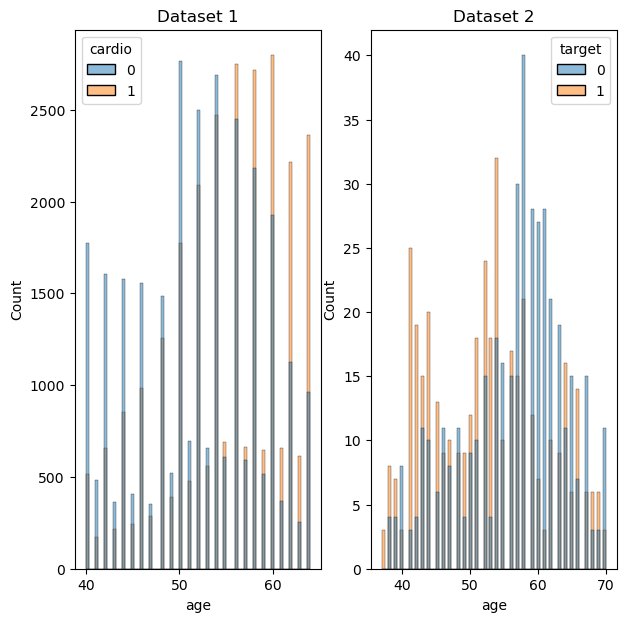

In [1904]:
# Creating a stacked barplot
f, ax = plt.subplots(1, 2, figsize=(7, 7))
sns.histplot(data=cvd_df,x="age",hue="cardio",bins=75, ax=ax[0])
sns.histplot(data=cvd_df_2,x="age",hue="target",bins=75, ax=ax[1])
ax[0].set(xlabel='age', ylabel='Count', title='Dataset 1')
ax[1].set(xlabel='age', ylabel='Count', title='Dataset 2')
plt.show()

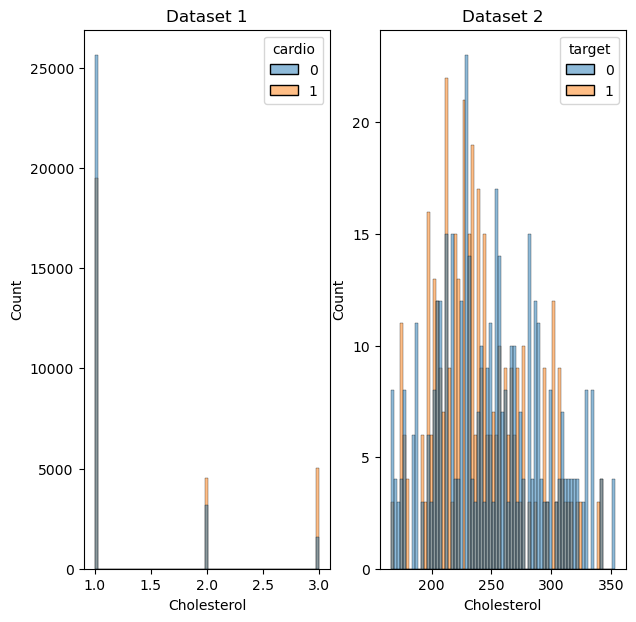

In [1905]:
# Creating a stacked barplot
f, ax = plt.subplots(1, 2, figsize=(7, 7))
sns.histplot(data=cvd_df,x="cholesterol",hue="cardio",bins=75, ax=ax[0])
sns.histplot(data=cvd_df_2,x="chol",hue="target",bins=75, ax=ax[1])
ax[0].set(xlabel='Cholesterol', ylabel='Count', title='Dataset 1')
ax[1].set(xlabel='Cholesterol', ylabel='Count', title='Dataset 2')
plt.show()

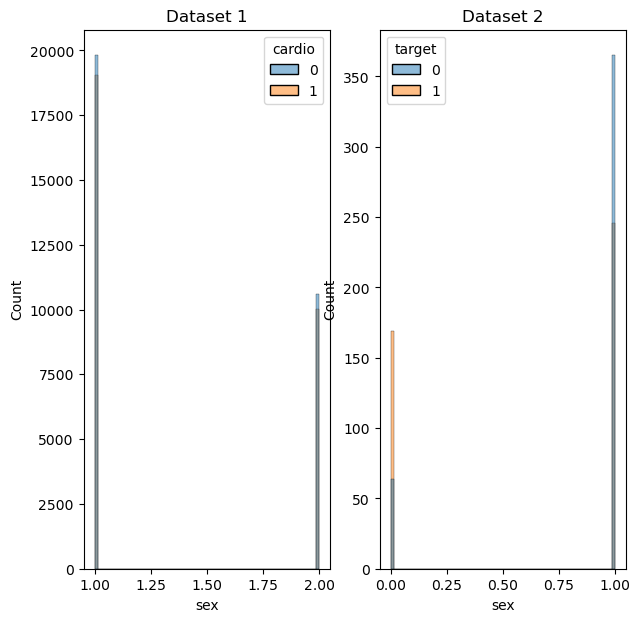

In [1906]:
# Creating a stacked barplot
f, ax = plt.subplots(1, 2, figsize=(7, 7))
sns.histplot(data=cvd_df,x="gender",hue="cardio",bins=75, ax=ax[0])
sns.histplot(data=cvd_df_2,x="sex",hue="target",bins=75, ax=ax[1])
ax[0].set(xlabel='sex', ylabel='Count', title='Dataset 1')
ax[1].set(xlabel='sex', ylabel='Count', title='Dataset 2')
plt.show()

,cardio_1,target_2
age,0.232756,-0.236082
gender,-0.004449,
height,-0.030572,
weight,0.158621,
ap_hi,0.427605,
ap_lo,0.320799,
cholesterol,0.216318,
gluc,0.085397,
smoke,-0.023331,
alco,-0.014482,


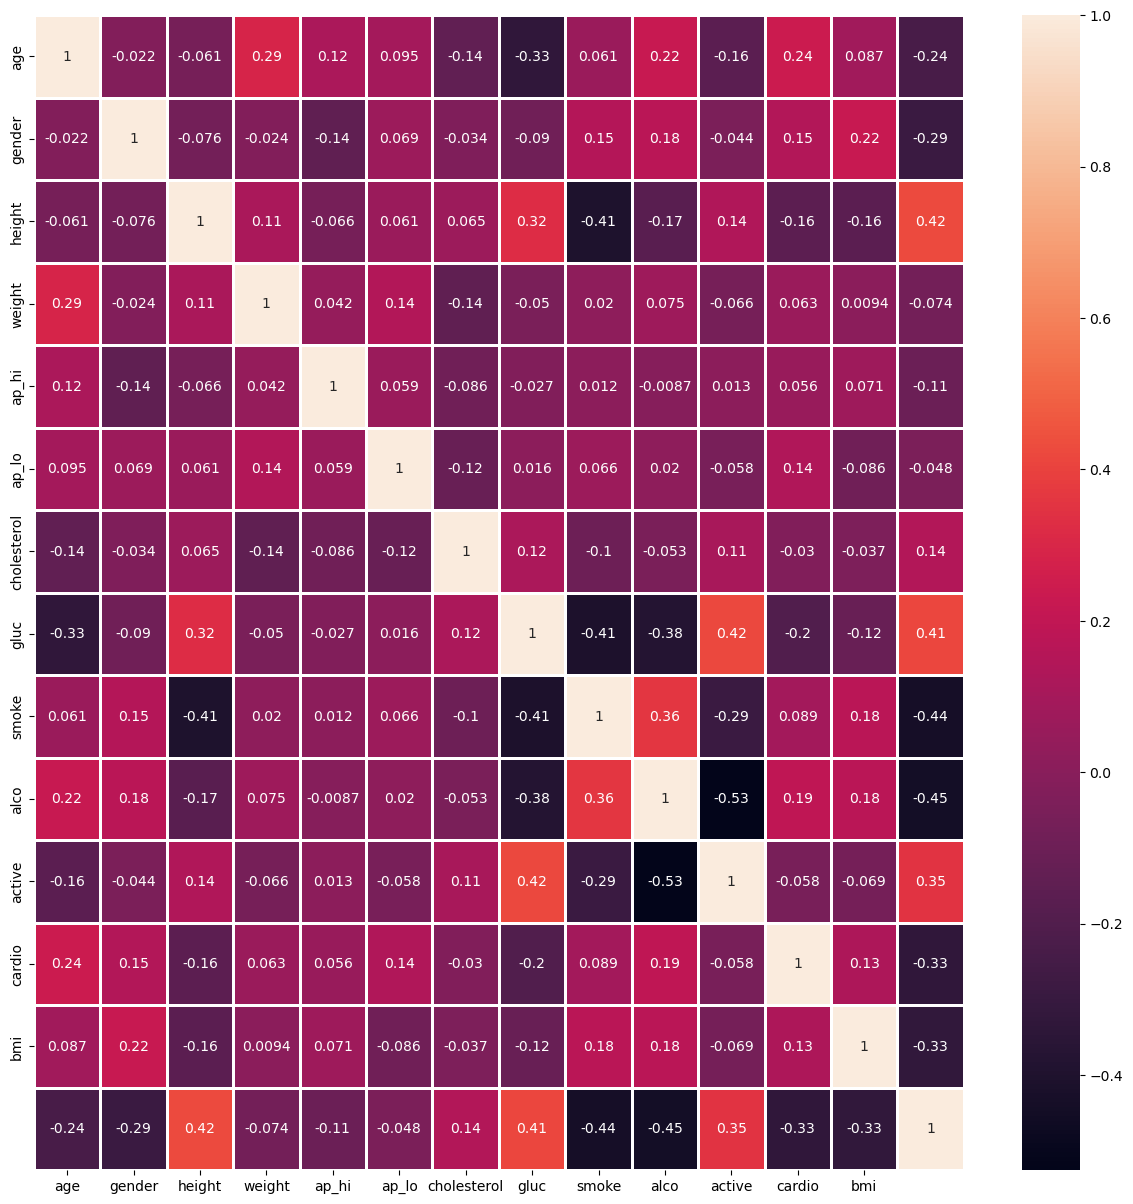

In [1907]:
# Visualizing Correlations - the mutual relationship between cardio and all other features
plt.figure(figsize=(15,15))
# Calculating Pearson corraltions for cardio
correlation2 = cvd_df_2.corr()['target']
correlation2 = pd.DataFrame(correlation2)
# Looking at full heatmap 
corr2 = cvd_df_2.corr()
sns.heatmap(corr2, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True, linewidths=1);
correlation2
pd.concat([
    correlation.add_suffix('_1'),
    correlation2.add_suffix('_2')
  ], axis=1).fillna('')

## Identify 3 research questions and perform analysis



### OVERVIEW YOUR QUESTION AND PERFORM YOUR ANALYSIS IN THIS SECTION
The questions I am primarily interested in answering are the following: 
* __Question 1: Can we use Decision Tree and Random Forest Classification to predict whether the participant has a CVD event? With what accuracy can we make our predict?__
* __Question 2: Using Dataset 1, can we employ a Bernoulli Distribution for Classification? Will this give us a better a better prediction?__  
* __Question 3: Using Dataset 1, can we use Cluster Analysis to find cluster trends?__
* __Question 4: Does the second dataset show the same trends to predict a CVD (amongst the same features) using Decision Tree and Random Forest? What features are most important to predicting the target in this dataset?__ 

# 1st Dataset

# Classification Prediction

## Before we start, what's the probability of misclassification? 

### Gini Index
The Gini impurity indicates the diversity of the dataset.  It tells us what is the probability of misclassifying an observation.

T he lower the Gini the better the split. Gini=0 means it's very homogeneous and a Gini close to 1 means very diverse. Gini Impurity is calculated by:
$$G = 1 - \sum_i p_i^2$$
Where *p(i)* is the probability of picking a datapoint with class i.

Decision tree algorithms use the Gini impurity index to decide the best split from a root node. 

In [1908]:
# 1. Find the counts of cardio events (0 or 1)
print("Dataset 1")
print(f"Sum of all cases with no CVD: {(cvd_df['cardio']==0).sum()} \nSum of all cases with CVDs: {(cvd_df['cardio']==1).sum()} \n Total: {cvd_df['cardio'].count()}")

Dataset 1
Sum of all cases with no CVD: 30412 
Sum of all cases with CVDs: 29070 
 Total: 59482


In [1909]:
# 1. Find the counts of target events (0 or 1)
print(f"\nDataset 2")
print(f"Sum of all cases with no CVD: {(cvd_df_2['target']==0).sum()} \nSum of all cases with CVDs: {(cvd_df_2['target']==1).sum()} \n Total: {cvd_df_2['target'].count()}")


Dataset 2
Sum of all cases with no CVD: 429 
Sum of all cases with CVDs: 415 
 Total: 844


In [1910]:
# Dataset 1
1 - ((30412/69992)**2 + (29070/69992)**2)

0.6387021888927795

In [1911]:
# Dataset 2
1 - ((358/709)**2 + (351/709)**2)

0.4999512613367125

We get a Gini Index of almost 0.64 (0.6387). A Gini Index that is closer to 1 illustrates that there is more of a random distribution of elements among various classes. For our second dataset we see that we have a smaller Gini Index of almost 0.5 (0.4999) illustrates that there is equal distribution of elements across some classes.  For our purposes, decision trees will select the split that minimizes the Gini value.

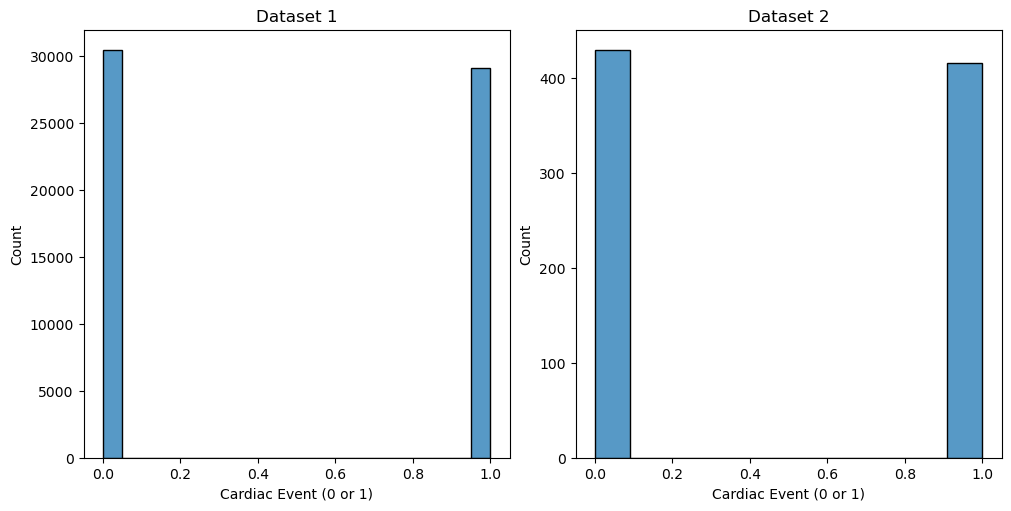

In [1912]:
# Showing a distribution of the counts of CVD events (Binary) between two datasets
fig, ax = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
sns.histplot(data=cvd_df,x="cardio", ax=ax[0])
sns.histplot(data=cvd_df_2,x="target", ax=ax[1])
ax[0].set(xlabel='Cardiac Event (0 or 1)', ylabel='Count', title='Dataset 1')
ax[1].set(xlabel='Cardiac Event (0 or 1)', ylabel='Count', title='Dataset 2')
#fig.supxlabel('Cardiac Event (0 or 1)')
#fig.supylabel('Count')
plt.show()

# __Question 1: Can we use Decision Tree and Random Forest Classification to predict whether the participant has a CVD event? With what accuracy can we make our predict?__


### Classification Steps

In [1913]:
# Dataset 1
# 1. Dropping 'cardio' to create the input dataframe for the Decision Tree and Random Forest Classifier
X = cvd_df.drop(columns=['cardio'])
# 2. Create output variable containing 'cardio' which we want to predict new values from input variables
y = cvd_df['cardio']
print(X.shape)
print(y.shape)

# Doing the same with dataset 2 
# 1. Dropping 'cardio' to create the input dataframe for the Decision Tree and Random Forest Classifier
X2 = cvd_df_2.drop(columns=['target'])
# 2. Create output variable containing 'cardio' which we want to predict new values from input variables
y2 = cvd_df_2['target']
print(X2.shape)
print(y2.shape)

(59482, 12)
(59482,)
(844, 13)
(844,)


In [1914]:
# 3. Create a Decision Tree Classifier note that the maximum number of leaf nodes is equal to the number of input features
model = tree.DecisionTreeClassifier(max_leaf_nodes=len(X.columns), random_state=42,criterion="gini")

# Dataset 2
model2 = tree.DecisionTreeClassifier(max_leaf_nodes=len(X2.columns), random_state=42,criterion="gini")


In [1915]:
# 4. Split data using 80-20 rule
# Dataset 1 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
# Dataset 2 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=100)


In [1916]:
# 5. Fit the classifier on the training data
model.fit(X_train, y_train)

# Dataset2
model2.fit(X2_train, y2_train)

DecisionTreeClassifier(max_leaf_nodes=13, random_state=42)

In [1917]:
# 6. Dataset 1: Create a predictions list for test data
predictions = model.predict(X_test)

print(predictions)

#print(y_test)
# Dataset 2: Create a predictions list for test data
predictions2 = model2.predict(X2_test)

print(predictions2)




[0 1 1 ... 1 0 1]
[1 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0
 0 0 1 1 1 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1
 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 0
 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0
 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 0]


In [1918]:
# 7. Calculate Accuracy
# Dataset 1
print(f"Dataset 1 Decision Tree Accuracy: {accuracy_score(y_true = y_test, y_pred = predictions)}")

# Dataset 2
print(f"Dataset 2 Decision Tree Accuracy: {accuracy_score(y_true = y2_test, y_pred = predictions2)}")

Dataset 1 Decision Tree Accuracy: 0.7209380516096495
Dataset 2 Decision Tree Accuracy: 0.8224852071005917


Accuracy scores from 70-90% are considered good scores. The accuracy score for the first prediction is approximately 72% which is a good score but the accuracy score for the second dataset was better at 82%. This is probably due to the fact that decision trees are more accurate on smaller datasets and dataset 2 is significantly smaller.  

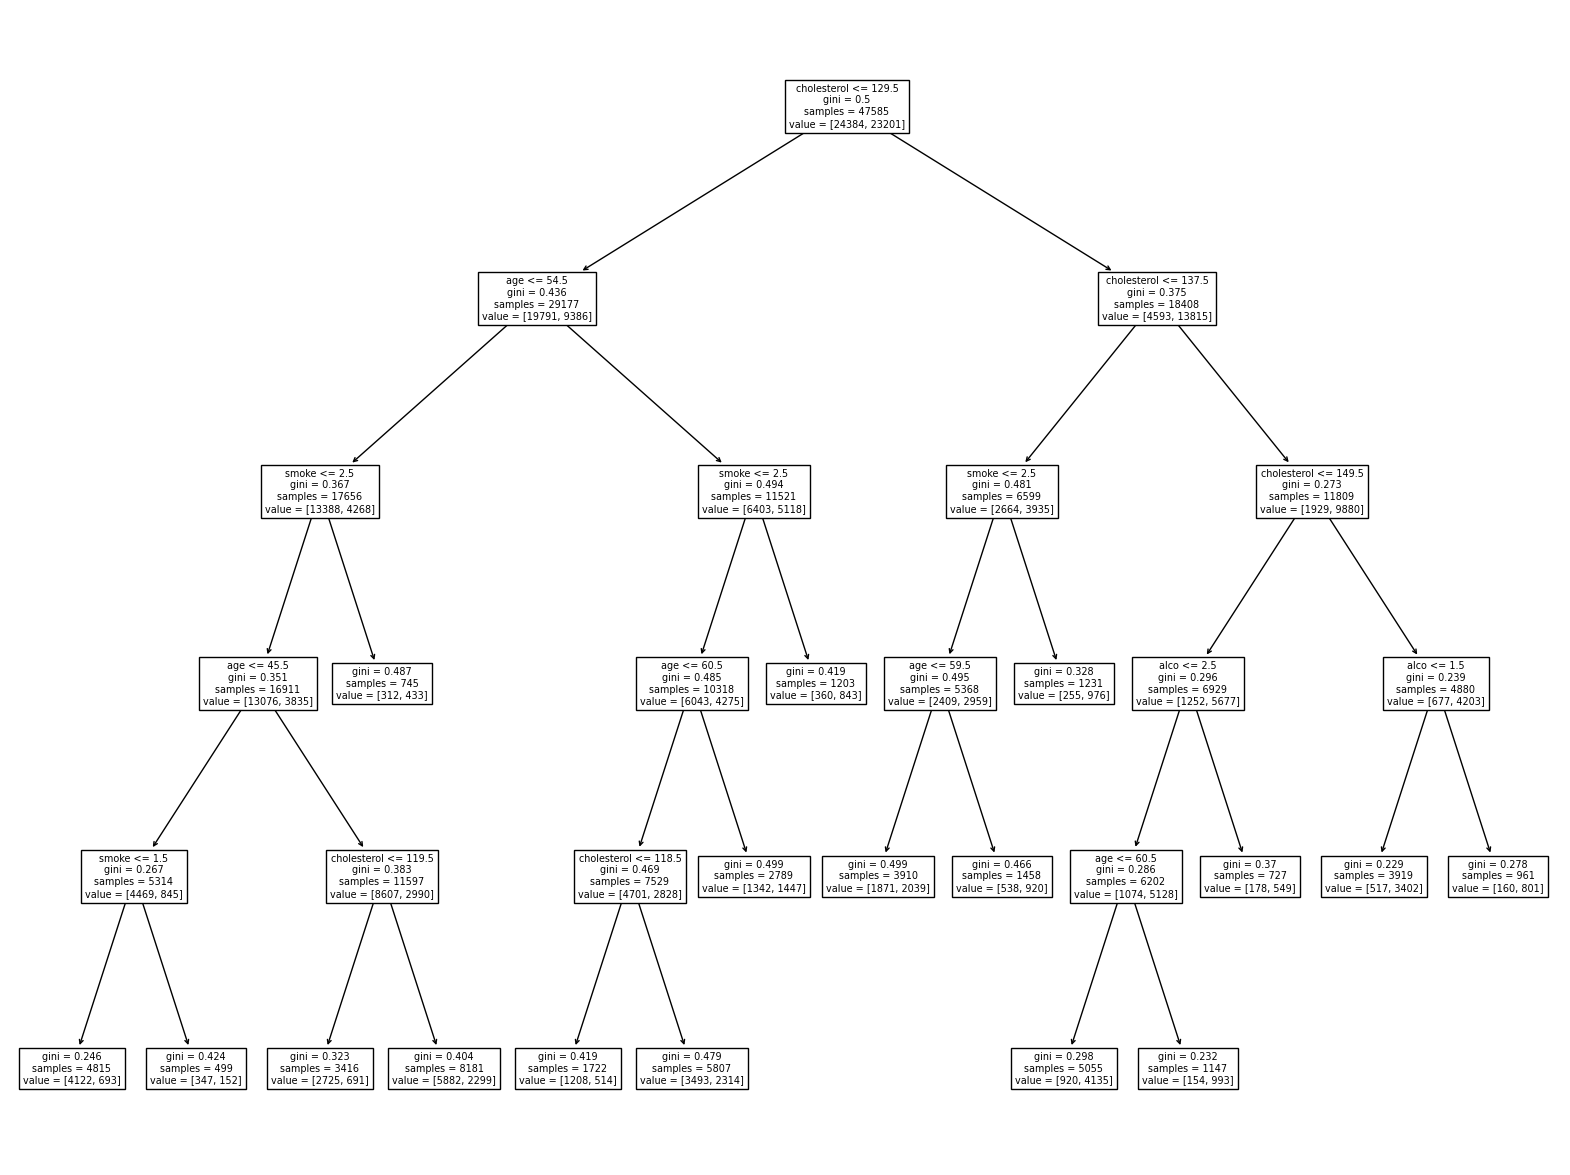

In [1919]:
# Plotting the Decision Tree features 
features=["age","gender","ap_hi","ap_lo","cholesterol","gluc","smoke","alco","active","bmi"]
fig, ax=plt.subplots(figsize=(20,15))
clf = DecisionTreeClassifier(criterion="gini", min_samples_split=0.1,max_depth=5,min_samples_leaf= 0.001)
pred=clf.fit(X,y)
ax=tree.plot_tree(pred.fit(X_train,y_train),feature_names=features)

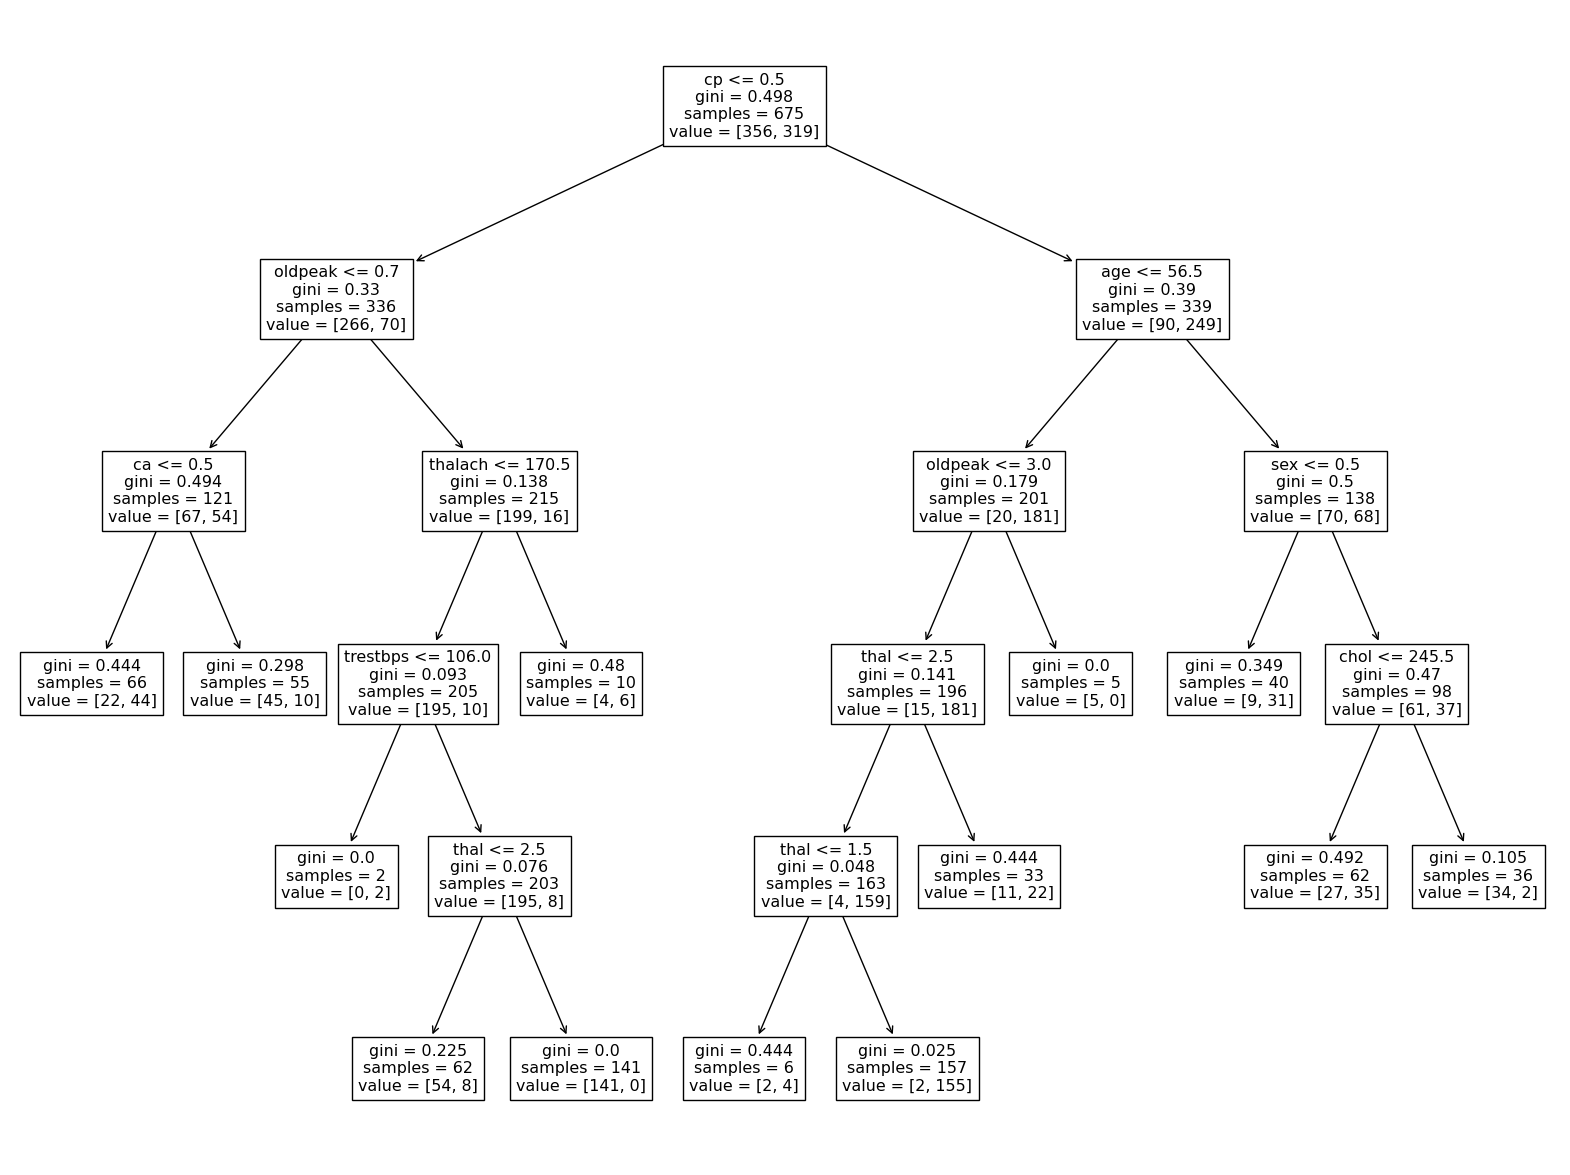

In [1920]:
# Plotting the Decision Tree features 
features2=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']
fig, ax=plt.subplots(figsize=(20,15))
clf2 = DecisionTreeClassifier(criterion="gini", min_samples_split=0.1,max_depth=5,min_samples_leaf= 0.001)
pred2=clf2.fit(X,y)
ax2=tree.plot_tree(pred2.fit(X2_train,y2_train),feature_names=features2)

The Decision Tree Classifier uses the Gini Impurity measure which tends to isolate the most frequent class in its own branch of the tree. Dataset 1 one's most frequent class was cholesterol and Dataset 2's most frequent class was chest pain. 

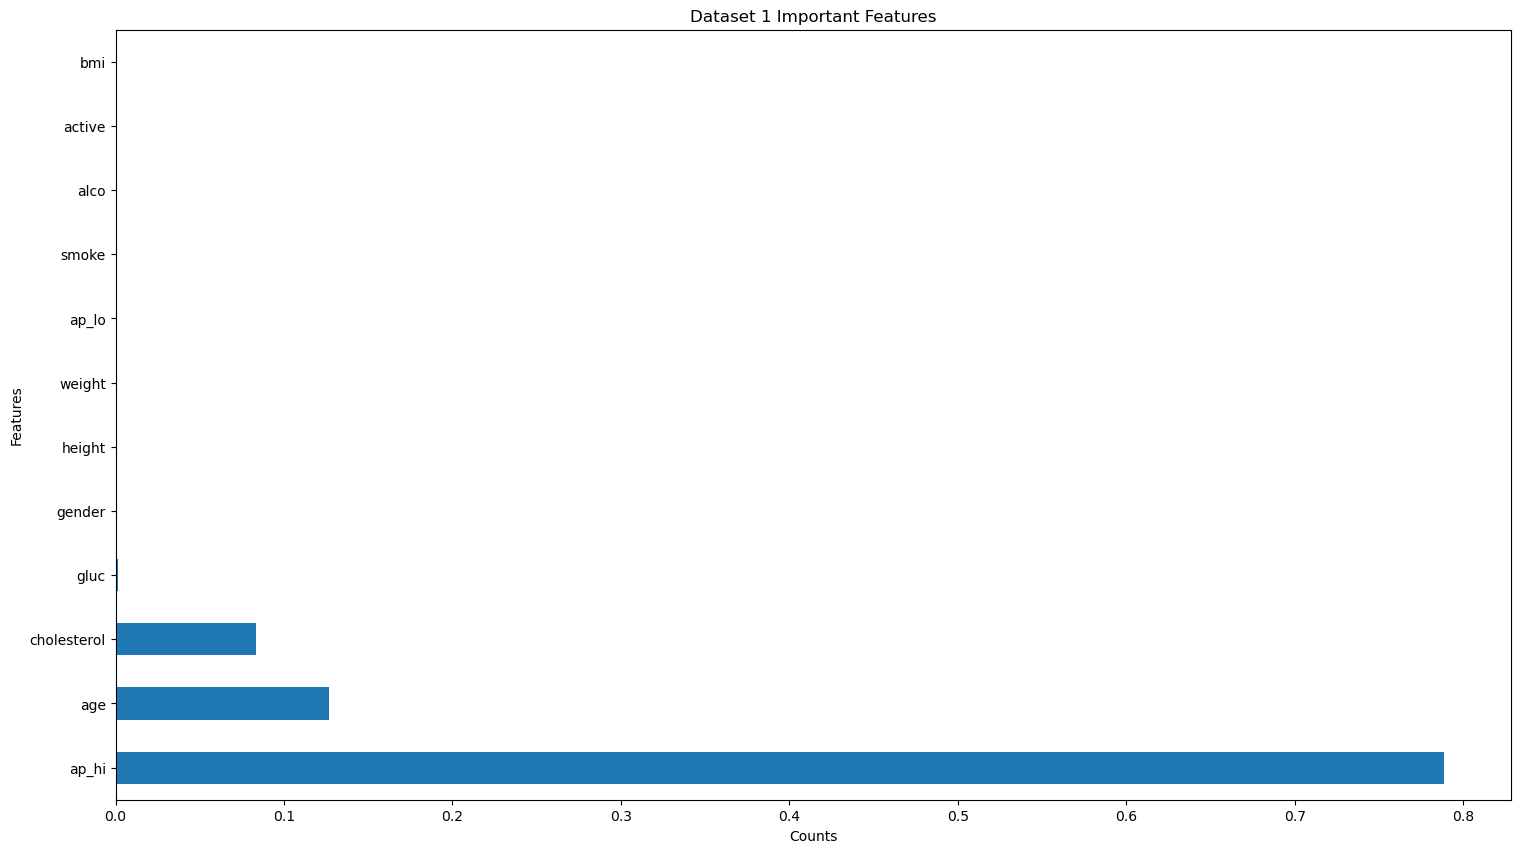

In [1921]:
# 5. Which features are most important in the model? 
clf.feature_importances_

# 6. Plotting these important feaures 
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)

#fig, ax = plt.subplots(1, 2, constrained_layout=True)
feature_importances.nlargest(20).plot(kind='barh', figsize=(18,10))
plt.xlabel("Counts")
plt.ylabel("Features")
plt.title("Dataset 1 Important Features")
plt.show()

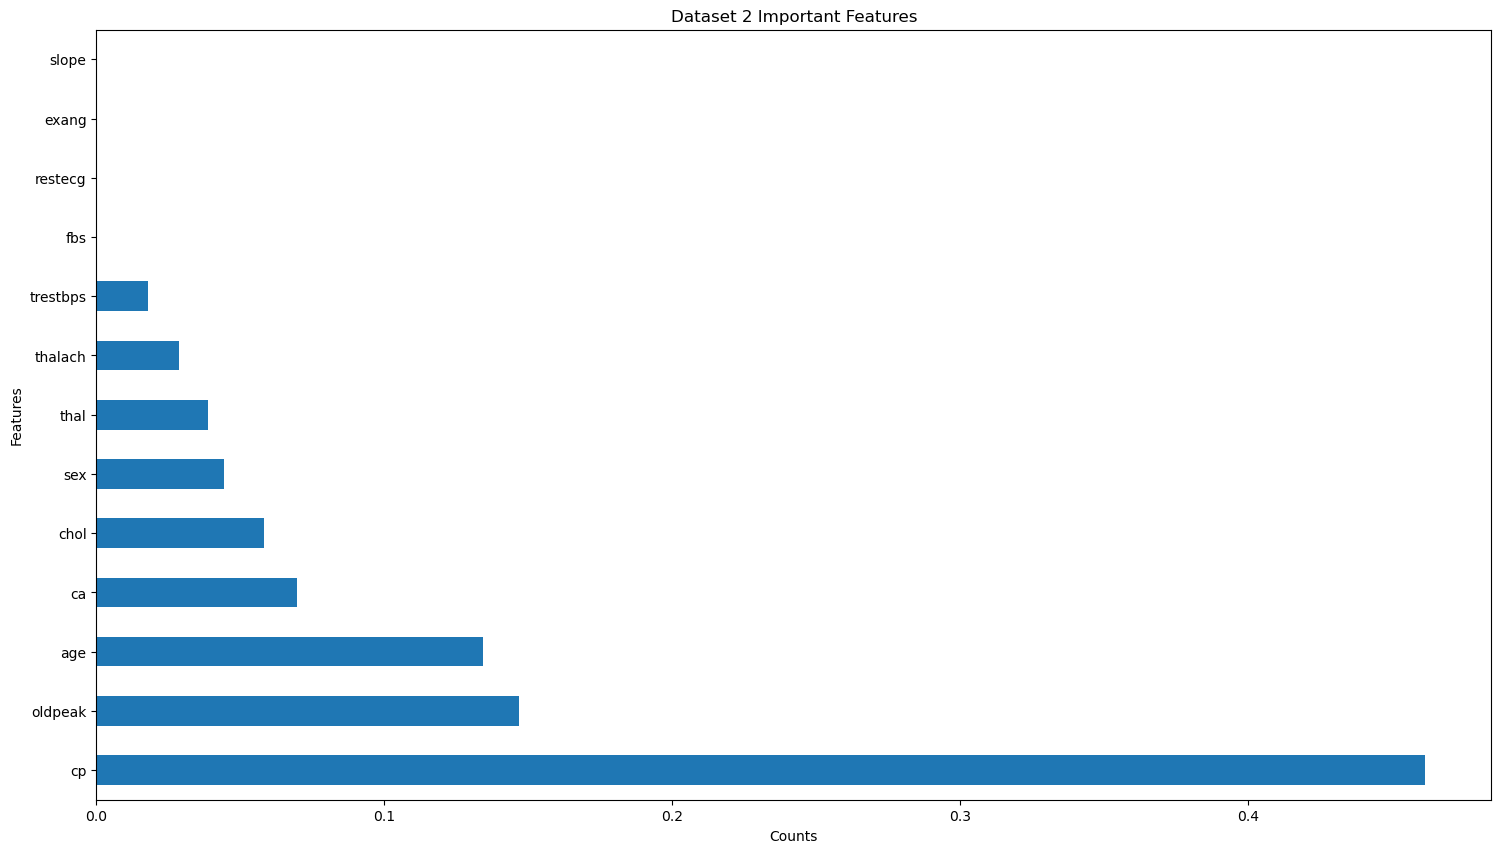

In [1922]:
clf2.feature_importances_
feature_importances2 = pd.Series(clf2.feature_importances_, index=X2.columns)
feature_importances2.nlargest(20).plot(kind='barh', figsize=(18,10));
plt.xlabel("Counts")
plt.ylabel("Features")
plt.title("Dataset 2 Important Features")
plt.show()

In [1923]:
# Feeding in the first case to see the prediction
print(X.iloc[:1])
print(X2.iloc[:1])

    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0  50.0       2    1.68    62.0    110     80            1     1      0     0   

   active  bmi  
0       1  2.0  
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   

   ca  thal  
0   2     3  


In [1924]:
# Using the first case's data (first dataset)
clf.predict([[50.0,2, 1.68, 62.0,110,80,1,1,0,0,1,2.0]])


/Users/ameek/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [1925]:
# Checking to see if this matches what y was
clf.predict(X.iloc[:1])

array([0])

In [1926]:
clf.predict_proba(X.iloc[:1])

array([[0.79771663, 0.20228337]])

In [1927]:
# Using the first case's data (second dataset)
clf2.predict([[52,1, 0, 125, 212, 0,1,168,0,1.0,2,2,3]])

/Users/ameek/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [1928]:
# Checking to see if this matches what y was second dataset)
clf2.predict(X2.iloc[:1])

array([0])

In [1929]:
clf2.predict_proba(X2.iloc[:1])

array([[1., 0.]])

### Employing a Random Forest 

In [1930]:
# 1. Create a Random Forest Classifier
clf = RandomForestClassifier(max_leaf_nodes=len(X.columns),random_state=100, criterion="gini")
# 2. Fit the classifier on the training data
clf.fit(X_train, y_train)


RandomForestClassifier(max_leaf_nodes=12, random_state=100)

In [1931]:
# 3. Create a predictions for the test data
predictions = clf.predict(X_test)
# 4. Calculate the Accuracy
accuracy_score(y_true = y_test, y_pred = predictions)


0.7178280238715643

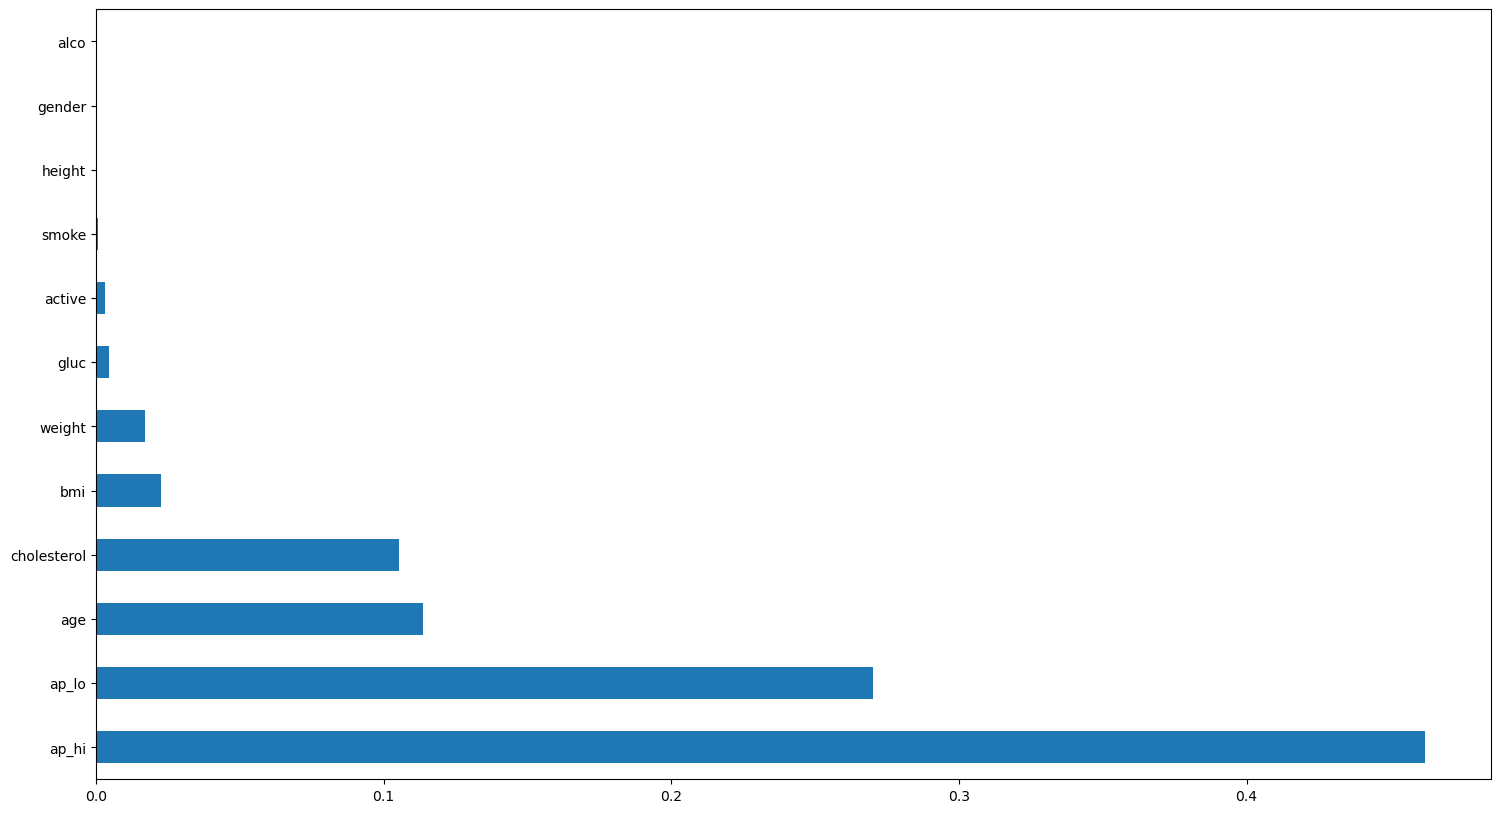

In [1932]:
# 5. Which features are most important in the model? 
clf.feature_importances_
# 6. Plotting these important feaures 
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh', figsize=(18,10));


### Making a prediction from the Random Forest Classifier

In [1933]:
# Feeding in the first case to see the prediction
X.iloc[:1]


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,2.0


In [1934]:
# Using the first case's data
clf.predict([[50.0,2, 1.68, 62.0,110,80,1,1,0,0,1,2.0]])


/Users/ameek/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [1935]:
# Checking to see if this matches what y was
clf.predict(X.iloc[:1])


array([0])

In [1936]:
clf.predict_proba(X.iloc[:1])


array([[0.75055666, 0.24944334]])

The shows that the model is 24.9% confident that the correct answer is 1 and 75.1 confident that the correct answer is 0. 0 is the correct answer in this case, as shown above.  

In [1937]:
# Predicting a set of cases (using the first 10 rows of dataframe)
prediction_x = clf.predict(X_test)[:100]
prediction_x


array([0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1])

In [1938]:
prediction_y = y_test[:100]
prediction_y


45110    0
26054    0
29962    1
46784    1
19155    1
        ..
20984    1
30117    1
52210    1
13145    0
22154    0
Name: cardio, Length: 100, dtype: int64

In [1939]:
prediction_x_df = pd.DataFrame(prediction_x)
prediction_x_df.rename({0: 'cardio'}, axis=1, inplace=True)
prediction_y_df = pd.DataFrame(prediction_y)
prediction_y_df.reset_index(drop = True, inplace=True)


In [1940]:
# Comparing the indices values between the input and predicted output
idx = prediction_x_df.index.intersection(prediction_y_df.index)
comparison_df = prediction_x_df.eq(prediction_y_df).loc[idx]


In [1941]:
values_df=comparison_df.cardio.value_counts()
values_df = pd.DataFrame(values_df)
values_df 


,cardio
True,78
False,22


On our test input of 100 cases the model predicts the right outcome 78% of the time.

# __Question 2: Using Dataset 1, can we employ a Bernoulli Distribution for Classification? Will this give us a better a better prediction?__ 

__Naive Bayes__

Naive Bayes follows a gaussian distribution and is primarly used to model the distibution of inputs of a category. Naive Bayes assumes: 
1. Independence of model features. 
2. Each feature makes an equally contribution (same weight) to the outcome.

I will employ a Bernoulli Naives Bayes because the target, 'cardio' is binary. Each trial has two outcomes - either the participant has a CVD or not.  

In [1942]:
cvd_df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
count,59482.000000,59482.000000,59482.000000,59482.000000,59482.000000,59482.000000,59482.000000,59482.000000,59482.000000,59482.000000,59482.000000,59482.000000,59482.000000
mean,53.360580,1.346575,1.645477,73.436054,125.789129,81.063263,1.352073,1.220874,0.085589,0.051679,0.803722,0.488719,2.859369
std,6.641497,0.475883,0.068300,11.621351,13.754454,8.234410,0.671076,0.568387,0.279758,0.221381,0.397184,0.499877,0.780026
min,40.000000,1.000000,1.500000,52.000000,100.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,49.000000,1.000000,1.600000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,54.000000,1.000000,1.650000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000
75%,58.000000,2.000000,1.690000,80.000000,135.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3.000000
max,64.000000,2.000000,1.800000,106.000000,160.000000,100.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [1943]:
# Making a new categorical dataframe 
categorical_df = cvd_df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi']].copy(deep=True)
categorical_df 

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0,2.0
1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1,4.0
2,52.0,1,1.65,64.0,130,70,3,1,0,0,0,1,2.0
3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1,3.0
4,48.0,1,1.56,56.0,100,60,1,1,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,54.0,1,1.72,70.0,130,90,1,1,0,0,1,1,2.0
69994,58.0,1,1.65,80.0,150,80,1,1,0,0,1,1,3.0
69995,53.0,2,1.68,76.0,120,80,1,1,1,0,1,0,3.0
69998,61.0,1,1.63,72.0,135,80,1,2,0,0,0,1,3.0


In [1944]:
# Converting each column into a 0 or 1 binary category for the Bernoulli by binning 
categorical_df['age_cat'] = pd.cut(categorical_df['age'], 
                               bins=[0, 54, 64], 
                               labels=[0, 1])
categorical_df['gender_cat'] = pd.cut(categorical_df['gender'], 
                               bins=[0, 1, 2], 
                               labels=[0, 1])
categorical_df['height_cat'] = pd.cut(categorical_df['height'], 
                               bins=[0, 1.65, 1.8], 
                               labels=[0, 1])
categorical_df['weight_cat'] = pd.cut(categorical_df['weight'], 
                               bins=[0, 72, 106], 
                               labels=[0, 1])
categorical_df['ap_hi_cat'] = pd.cut(categorical_df['ap_hi'], 
                               bins=[0, 120, 160], 
                               labels=[0, 1])
categorical_df['ap_lo_cat'] = pd.cut(categorical_df['ap_lo'], 
                               bins=[0, 80, 100], 
                               labels=[0, 1])
categorical_df['chol_cat'] = pd.cut(categorical_df['cholesterol'], 
                               bins=[0, 1.5, 3], 
                               labels=[0, 1])
categorical_df['gluc_cat'] = pd.cut(categorical_df['gluc'], 
                               bins=[0, 1, 3], 
                               labels=[0, 1])
categorical_df['bmi_cat'] = pd.cut(categorical_df['bmi'], 
                               bins=[0, 2, 4], 
                               labels=[0, 1])



In [1945]:
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59482 entries, 0 to 69999
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          59482 non-null  float64 
 1   gender       59482 non-null  int64   
 2   height       59482 non-null  float64 
 3   weight       59482 non-null  float64 
 4   ap_hi        59482 non-null  int64   
 5   ap_lo        59482 non-null  int64   
 6   cholesterol  59482 non-null  int64   
 7   gluc         59482 non-null  int64   
 8   smoke        59482 non-null  int64   
 9   alco         59482 non-null  int64   
 10  active       59482 non-null  int64   
 11  cardio       59482 non-null  int64   
 12  bmi          59482 non-null  float64 
 13  age_cat      59482 non-null  category
 14  gender_cat   59482 non-null  category
 15  height_cat   59482 non-null  category
 16  weight_cat   59482 non-null  category
 17  ap_hi_cat    59482 non-null  category
 18  ap_lo_cat    59482 non-nul

In [1946]:
categorical_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
bmi            0
age_cat        0
gender_cat     0
height_cat     0
weight_cat     0
ap_hi_cat      0
ap_lo_cat      0
chol_cat       0
gluc_cat       0
bmi_cat        0
dtype: int64

In [1947]:
categorical_df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio', 'bmi', 'age_cat',
       'gender_cat', 'height_cat', 'weight_cat', 'ap_hi_cat', 'ap_lo_cat',
       'chol_cat', 'gluc_cat', 'bmi_cat'],
      dtype='object')

In [1948]:
# 1. Dropping 'cardio' to create the input dataframe
X1 = categorical_df.drop(columns=['cardio', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'bmi'])

# 2. Create output variable containing 'cardio' which I want to predict new values from input variables
y1 = categorical_df['cardio']
print(X.shape)
print(y.shape)


(59482, 12)
(59482,)


In [1949]:
# 3. Split data using 80-20 rule 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=100)


In [1950]:
# Standard scaling for the data
scaler = StandardScaler()
X1_train = scaler.fit_transform(X_train)
X1_test = scaler.transform(X_test)


In [1951]:
# Calling BernoulliNB function and passing in binarize=True so the function binarizes our data.  
bnb = BernoulliNB(binarize=True) 
# Fitting the model and passing in X_test and y_test 
bnb.fit(X1_train,y1_train)


BernoulliNB(binarize=True)

In [1952]:
bnb_train = bnb.score(X1_train,y1_train)
bnb_train


0.707365766523064

In [1953]:
# The expected labels are y_test and we are comparing that to y_pred_bnb, the predicted labels.
y_pred_bnb = bnb.predict(X1_test)
# Finding the accuracy score
accuracy_score(y1_test,y_pred_bnb)


0.7083298310498445

The accuracy score of the Bernoulli Naive Bayes algorithm is 70.6% for this model. This gave us a worse prediction. 

# __Question 3: Using Dataset 1, can we use Cluster Analysis to find cluster trends?__

# Cluster Analysis (KModes)

In [1976]:
# Using KModes instead of Kmeans for Categorical data 
new_cat_df = categorical_df.drop(columns=['cardio', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'bmi'])

In [1977]:
proto_df = new_cat_df.values
proto_df

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 1, ..., 0, 1, 2],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [1978]:
# Telling KModes to get me 3 clusters for the data doing 3 iterations and it stops as soon as it finds cluster
kproto = KModes(n_clusters=3, verbose=2, max_iter=5)
# Fiting and predicting
cluster= kproto.fit_predict(proto_df, categorical = [0,1,2,3,4,5,6,7,8,9,10,11]) # passing categorical columns


Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/5, moves: 8065, cost: 169261.0


In [1980]:
# Getting the centers of the clusters 
print(kproto.cluster_centroids_)


[[0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 0 1 1 1 1 1 1 1 1 0 1 1]
 [0 0 1 1 0 1 1 1 1 0 0 1 1]]


In [1981]:
# Attach the clusters to original dataframe to see any trends 
cluster_list = []
for i in cluster:
    cluster_list.append(i)
#cluster_dict
# Creating a cluster column and assigning to dictionary
cvd_df['cluster'] = cluster_list
cvd_df


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,cluster
0,50.0,2,1.68,62.0,110,80,1,1,0,0,1,0,2.0,0
1,55.0,1,1.56,85.0,140,90,3,1,0,0,1,1,4.0,1
2,52.0,1,1.65,64.0,130,70,3,1,0,0,0,1,2.0,0
3,48.0,2,1.69,82.0,150,100,1,1,0,0,1,1,3.0,1
4,48.0,1,1.56,56.0,100,60,1,1,0,0,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,54.0,1,1.72,70.0,130,90,1,1,0,0,1,1,2.0,0
69994,58.0,1,1.65,80.0,150,80,1,1,0,0,1,1,3.0,0
69995,53.0,2,1.68,76.0,120,80,1,1,1,0,1,0,3.0,0
69998,61.0,1,1.63,72.0,135,80,1,2,0,0,0,1,3.0,0


In [1982]:
# Attach the clusters to original dataframe to see any trends 
cluster_list = []
for i in cluster:
    cluster_list.append(i)
#cluster_dict
# Creating a cluster column and assigning to dictionary
categorical_df['cluster'] = cluster_list
categorical_df


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,...,age_cat,gender_cat,height_cat,weight_cat,ap_hi_cat,ap_lo_cat,chol_cat,gluc_cat,bmi_cat,cluster
0,50.0,2,1.68,62.0,110,80,1,1,0,0,...,0,1,1,0,0,0,0,0,0,0
1,55.0,1,1.56,85.0,140,90,3,1,0,0,...,1,0,0,1,1,1,1,0,1,1
2,52.0,1,1.65,64.0,130,70,3,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,48.0,2,1.69,82.0,150,100,1,1,0,0,...,0,1,1,1,1,1,0,0,1,1
4,48.0,1,1.56,56.0,100,60,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,54.0,1,1.72,70.0,130,90,1,1,0,0,...,0,0,1,0,1,1,0,0,0,0
69994,58.0,1,1.65,80.0,150,80,1,1,0,0,...,1,0,0,1,1,0,0,0,1,0
69995,53.0,2,1.68,76.0,120,80,1,1,1,0,...,0,1,1,1,0,0,0,0,1,0
69998,61.0,1,1.63,72.0,135,80,1,2,0,0,...,1,0,0,0,1,0,0,1,1,0


Clustering Statistics (Cluster 1)
Sum of all women: 31061 
Sum of all men: 11408 
 Total: 42469


Sum of all bmi = 1: 112 
Sum of bmi=2: 19728 
Sum of bmi=3: 14781 
Sum of bmi=4: 7848


Sum of all cholesterol = 1: 36036 
Sum of cholesterol=2: 3759 
Sum of cholesterol=3: 2674


Sum of all glucose = 1: 37711 
Sum of glucose=2: 2365 
Sum of glucose=3: 2393


Sum of all age (54 and under) = 0: 27816 
Sum of age (above 54) = 1: 14653


Sum of all alcohol = 0: 40695 
Sum of alcohol = 1: 1774


Sum of all non-smoke = 0: 39601 
Sum of smoke = 1: 2868


Sum of all target = 0: 25306 
Sum of target = 1: 17163


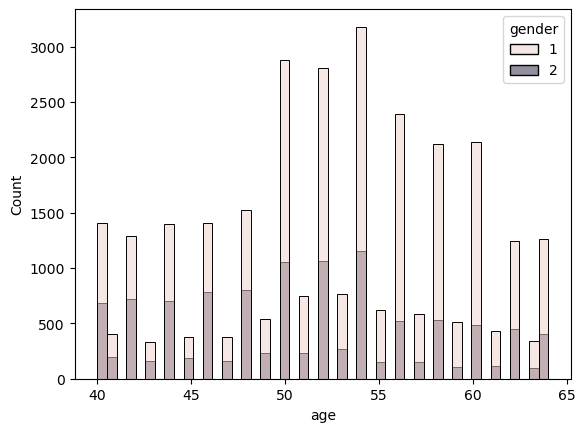

In [1983]:
# Finding trends in the first cluster 
cluster_1 = categorical_df[categorical_df['cluster']==0]
print(f"Clustering Statistics (Cluster 1)")
print(f"Sum of all women: {(cluster_1['gender']==1).sum()} \nSum of all men: {(cluster_1['gender']==2).sum()} \n Total: {cluster_1['gender'].count()}")
print(f"\n")
print(f"Sum of all bmi = 1: {(cluster_1['bmi']==1).sum()} \nSum of bmi=2: {(cluster_1['bmi']==2).sum()} \nSum of bmi=3: {(cluster_1['bmi']==3).sum()} \nSum of bmi=4: {(cluster_1['bmi']==4).sum()}") 
print(f"\n")
print(f"Sum of all cholesterol = 1: {(cluster_1['cholesterol']==1).sum()} \nSum of cholesterol=2: {(cluster_1['cholesterol']==2).sum()} \nSum of cholesterol=3: {(cluster_1['cholesterol']==3).sum()}") 
print(f"\n")
print(f"Sum of all glucose = 1: {(cluster_1['gluc']==1).sum()} \nSum of glucose=2: {(cluster_1['gluc']==2).sum()} \nSum of glucose=3: {(cluster_1['gluc']==3).sum()}") 
print(f"\n")
print(f"Sum of all age (54 and under) = 0: {(cluster_1['age_cat']==0).sum()} \nSum of age (above 54) = 1: {(cluster_1['age_cat']==1).sum()}") 
print(f"\n")
print(f"Sum of all alcohol = 0: {(cluster_1['alco']==0).sum()} \nSum of alcohol = 1: {(cluster_1['alco']==1).sum()}") 
print(f"\n")
print(f"Sum of all non-smoke = 0: {(cluster_1['smoke']==0).sum()} \nSum of smoke = 1: {(cluster_1['smoke']==1).sum()}") 
print(f"\n")
print(f"Sum of all target = 0: {(cluster_1['cardio']==0).sum()} \nSum of target = 1: {(cluster_1['cardio']==1).sum()}") 

age_cluster_1 = pd.DataFrame(cluster_1['age'].value_counts())
sns.histplot(data = age_cluster_1, x=cluster_1['age'], hue=cluster_1['gender'])
plt.show()

Cluster 1 has around 3 times the amount of women as men, the bmi on average for this cluster is a middle bmi, whereas the glucose and cholesterol levels are normal.  Age is at the lower end. This cluster is also mostly non-alcoholic and non-smoking. This cluster also shows a lower incidence of a CVD.

Sum of all women: 4342 
Sum of all men: 9207 
 Total: 13549


Sum of all bmi = 1: 15 
Sum of bmi=2: 2404 
Sum of bmi=3: 6171 
Sum of bmi=4: 4959


Sum of all cholesterol = 1: 5649 
Sum of cholesterol=2: 3965 
Sum of cholesterol=3: 3935


Sum of all glucose = 1: 9967 
Sum of glucose=2: 1622 
Sum of glucose=3: 1960


Sum of all age (54 and under) = 0: 4147 
Sum of age (above 54) = 1: 9402


Sum of all alcohol = 0: 12319 
Sum of alcohol = 1: 1230


Sum of all non-smoke = 0: 11381 
Sum of smoke = 1: 2168


Sum of all target = 0: 4019 
Sum of target = 1: 9530


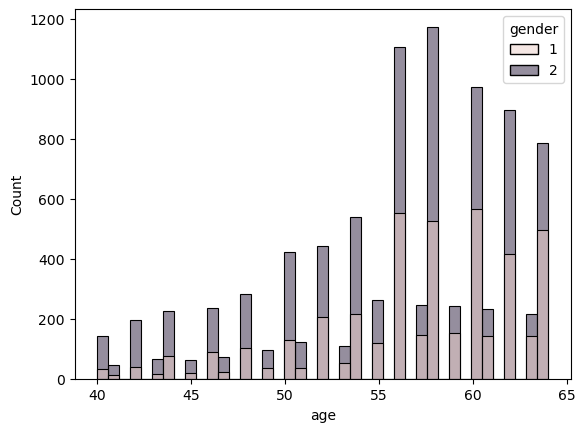

In [1984]:
# Finding trends in the second cluster 
cluster_2 = categorical_df[categorical_df['cluster']==1]
print(f"Sum of all women: {(cluster_2['gender']==1).sum()} \nSum of all men: {(cluster_2['gender']==2).sum()} \n Total: {cluster_2['gender'].count()}")
print(f"\n")
print(f"Sum of all bmi = 1: {(cluster_2['bmi']==1).sum()} \nSum of bmi=2: {(cluster_2['bmi']==2).sum()} \nSum of bmi=3: {(cluster_2['bmi']==3).sum()} \nSum of bmi=4: {(cluster_2['bmi']==4).sum()}") 
print(f"\n")
print(f"Sum of all cholesterol = 1: {(cluster_2['cholesterol']==1).sum()} \nSum of cholesterol=2: {(cluster_2['cholesterol']==2).sum()} \nSum of cholesterol=3: {(cluster_2['cholesterol']==3).sum()}") 
print(f"\n")
print(f"Sum of all glucose = 1: {(cluster_2['gluc']==1).sum()} \nSum of glucose=2: {(cluster_2['gluc']==2).sum()} \nSum of glucose=3: {(cluster_2['gluc']==3).sum()}") 
print(f"\n")
print(f"Sum of all age (54 and under) = 0: {(cluster_2['age_cat']==0).sum()} \nSum of age (above 54) = 1: {(cluster_2['age_cat']==1).sum()}") 
print(f"\n")
print(f"Sum of all alcohol = 0: {(cluster_2['alco']==0).sum()} \nSum of alcohol = 1: {(cluster_2['alco']==1).sum()}") 
print(f"\n")
print(f"Sum of all non-smoke = 0: {(cluster_2['smoke']==0).sum()} \nSum of smoke = 1: {(cluster_2['smoke']==1).sum()}") 
print(f"\n")
print(f"Sum of all target = 0: {(cluster_2['cardio']==0).sum()} \nSum of target = 1: {(cluster_2['cardio']==1).sum()}") 

age_cluster_2 = pd.DataFrame(cluster_2['age'].value_counts())
sns.histplot(data = age_cluster_2, x=cluster_2['age'], hue=cluster_2['gender'])
plt.show()

Cluster 2 has almost as double the men as women, the bmi on the higher side for this cluster, whereas the glucose and cholesterol levels are normal. The age for this cluster is mostly on the higher side. This cluster is also mostly non-alcoholic and non-smoking. This cluster also shows a higher incidence of a CVD. 

Sum of all women: 3464 
Sum of all men: 0 
 Total: 3464


Sum of all bmi = 1: 0 
Sum of bmi=2: 353 
Sum of bmi=3: 1544 
Sum of bmi=4: 1567


Sum of all cholesterol = 1: 3464 
Sum of cholesterol=2: 0 
Sum of cholesterol=3: 0


Sum of all glucose = 1: 3156 
Sum of glucose=2: 171 
Sum of glucose=3: 137


Sum of all age (54 and under) = 0: 422 
Sum of age (above 54) = 1: 3042


Sum of all alcohol = 0: 3394 
Sum of alcohol = 1: 70


Sum of all non-smoke = 0: 3409 
Sum of smoke = 1: 55


Sum of all target = 0: 1087 
Sum of target = 1: 2377


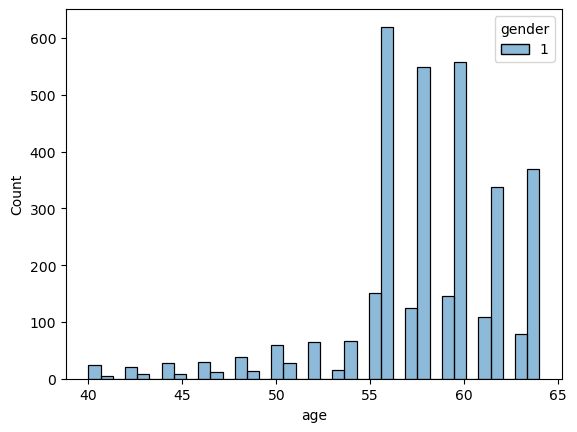

In [1985]:
# Finding trends in the third cluster
cluster_3 = categorical_df[categorical_df['cluster']==2]
print(f"Sum of all women: {(cluster_3['gender']==1).sum()} \nSum of all men: {(cluster_3['gender']==2).sum()} \n Total: {cluster_3['gender'].count()}")
print(f"\n")
print(f"Sum of all bmi = 1: {(cluster_3['bmi']==1).sum()} \nSum of bmi=2: {(cluster_3['bmi']==2).sum()} \nSum of bmi=3: {(cluster_3['bmi']==3).sum()} \nSum of bmi=4: {(cluster_3['bmi']==4).sum()}") 
print(f"\n")
print(f"Sum of all cholesterol = 1: {(cluster_3['cholesterol']==1).sum()} \nSum of cholesterol=2: {(cluster_3['cholesterol']==2).sum()} \nSum of cholesterol=3: {(cluster_3['cholesterol']==3).sum()}") 
print(f"\n")
print(f"Sum of all glucose = 1: {(cluster_3['gluc']==1).sum()} \nSum of glucose=2: {(cluster_3['gluc']==2).sum()} \nSum of glucose=3: {(cluster_3['gluc']==3).sum()}") 
print(f"\n")
print(f"Sum of all age (54 and under) = 0: {(cluster_3['age_cat']==0).sum()} \nSum of age (above 54) = 1: {(cluster_3['age_cat']==1).sum()}") 
print(f"\n")
print(f"Sum of all alcohol = 0: {(cluster_3['alco']==0).sum()} \nSum of alcohol = 1: {(cluster_3['alco']==1).sum()}") 
print(f"\n")
print(f"Sum of all non-smoke = 0: {(cluster_3['smoke']==0).sum()} \nSum of smoke = 1: {(cluster_3['smoke']==1).sum()}") 
print(f"\n")
print(f"Sum of all target = 0: {(cluster_3['cardio']==0).sum()} \nSum of target = 1: {(cluster_3['cardio']==1).sum()}") 

age_cluster_3 = pd.DataFrame(cluster_3['age'].value_counts())
sns.histplot(data = age_cluster_3, x=cluster_3['age'], hue=cluster_3['gender'])
plt.show()


Cluster 3 has only women as a gender, the bmi on average for this cluster is a higher bmi, whereas the glucose and cholesterol levels are normal. The age for this cluster is mostly on the higher side. This cluster is also mostly non-alcoholic and non-smoking. This cluster also shows a higher incidence of a CVD.

# __Question 4: Does the second dataset show the same trends to predict a CVD (amongst the same features) using Decision Tree and Random Forest? What features are most important to predicting the target in this dataset?__ 

In Question 1, we looked at a side by side view of Decision Tree classifier from Dataset 1 to Dataset 2. Here, we will look at Dataset 2 Random Forest prediction and compare it with Dataset 1
.

In [1963]:
# 1. Dropping 'cardio' to create the input dataframe for the Random Forest Classifier
X2 = cvd_df_2.drop(columns=['target'])
# 2. Create output variable containing 'cardio' which we want to predict new values from input variables
y2 = cvd_df_2['target']
print(X2.shape)
print(y2.shape)

(844, 13)
(844,)


In [1964]:
# 1. Create a Random Forest Classifier
clf_df2 = RandomForestClassifier(max_leaf_nodes=len(X2.columns),random_state=100, criterion="gini")
# 2. Fit the classifier on the training data
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=100)
clf_df2 .fit(X2_train, y2_train)


RandomForestClassifier(max_leaf_nodes=13, random_state=100)

In [1965]:
# 3. Create a predictions for the test data
predictions_df2 = clf_df2.predict(X2_test)
# 4. Calculate the Accuracy
accuracy_score(y_true = y2_test, y_pred = predictions_df2)

0.8579881656804734

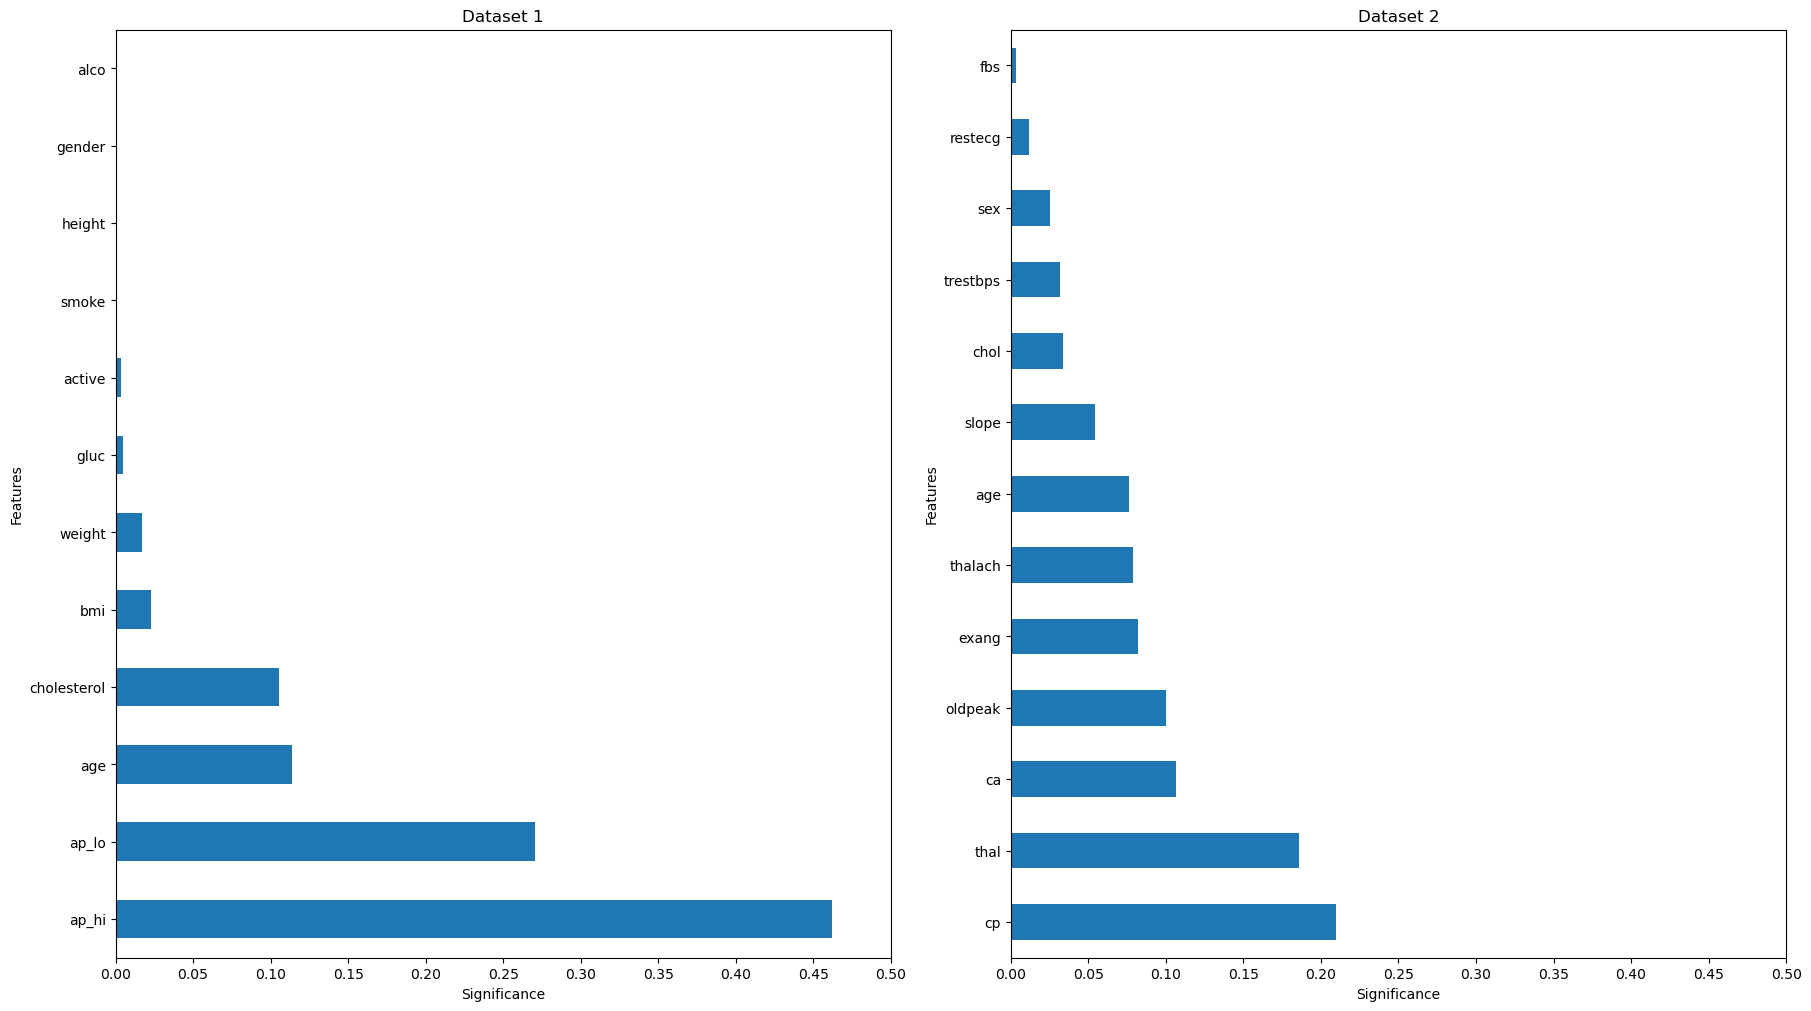

In [1966]:
# Plotting both dataset important features side by side`
# 5. Which features are most important in the model? 
fig, ax = plt.subplots(1, 2, figsize=(10, 5), constrained_layout=True)
clf_df2.feature_importances_
# 6. Plotting these important feaures 
feature_importances_df2 = pd.Series(clf_df2.feature_importances_, index=X2.columns)
feature_importances_df2.nlargest(20).plot(kind='barh', figsize=(18,10) , ax=ax[1]);

# 5. Which features are most important in the model? 
clf.feature_importances_
# 6. Plotting these important feaures 
feature_importances = pd.Series(clf.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh', figsize=(18,10), ax=ax[0]);

x = [0, .05, .1, .15, .2 , .25, .3, .35, .4, .45, .5]
ax[0].set(xlabel='Significance', ylabel='Features', title='Dataset 1' )
ax[1].set(xlabel='Significance', ylabel='Features', title='Dataset 2')
ax[0].set_xticks(x)
ax[1].set_xticks(x)
plt.show()

In [1967]:
# Feeding in the first case to see the prediction
X2.iloc[:1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [1968]:
# Using the first case's data
clf_df2.predict([[52,1, 0, 125, 212, 0,1,168,0,1.0,2,2,3]])

/Users/ameek/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [1969]:
# Checking to see if this matches what y was
clf_df2.predict(X2.iloc[:1])

/Users/ameek/anaconda3/lib/python3.10/site-packages/IPython/core/displayhook.py:281: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


array([0])

In [1970]:
clf_df2.predict_proba(X2.iloc[:1])

array([[0.84537581, 0.15462419]])

The shows that the model is 85% confident that the correct answer is 0 and 15% confident that the correct answer is 1. 0 is the correct answer in this case, as shown above.  

In [1971]:
# Predicting a set of cases (using the first 100 rows of dataframe)
prediction_x2 = clf_df2.predict(X2_test)[:100]
prediction_x2

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1])

In [1972]:
prediction_y2 = y2_test[:100]
prediction_y2

761    1
672    1
610    0
248    1
190    1
      ..
52     1
749    1
28     0
86     1
673    1
Name: target, Length: 100, dtype: int64

In [1973]:
prediction_x_df2 = pd.DataFrame(prediction_x2)
prediction_x_df2.rename({0: 'target'}, axis=1, inplace=True)
prediction_y_df2 = pd.DataFrame(prediction_y2)
prediction_y_df2.reset_index(drop = True, inplace=True)

In [1974]:
# Comparing the indices values between the input and predicted output
idx = prediction_x_df2.index.intersection(prediction_y_df2.index)
comparison_df2 = prediction_x_df2.eq(prediction_y_df2).loc[idx]

In [1975]:
values_df_2=comparison_df2.target.value_counts()
values_df_2 = pd.DataFrame(values_df_2)
values_df_2

,target
True,89
False,11


On our test input of 100 cases the model predict the right outcome 89% of the time. 

##  Presenting my findings


### Recall the following questions that we wanted to answer:
* __Question 1: Can we use Decision Tree and Random Forest Classification to predict whether the participant has a CVD event? With what accuracy can we make our predict?__
* __Question 2: Can we employ a Bernoulli Distribution for Classification? Will this give us a better a better prediction?__  
* __Question 3: Can we use Cluster Analysis to find cluster trends?__
* __Question 4: Does the second dataset show the same trends to predict a CVD (amongst the same features) using Decision Tree and Random Forest? What features are most important to predicting the target in this dataset?__ 

## Question 1 Analysis 
### Using Dataset 1, can we use Decision Tree and Random Forest Classification to predict whether the participant has a CVD event? With what accuracy can we make our predict?
I was able to employ supervised machine learning techniques in this project. Dataset 1 and 2 provided targets. This labeled data allowed me to use different prediction techniques. Because the target's data was categorical (binary), I was able to use both Decision Tree and Random Forest predicting values. I kept the impurity measure parameter as Gini (not entropy) since the Gini Index is faster to compute and it will isolate the most frequent class in its branch of the tree. I also computed the the Gini index to see what the impurity measure was. For Dataset 1, I found the Gini to be 0.639. Ideally, the Gini should be a lower number between 0-1. A Gini closer to 1 as was this Gini means the data was more diverse and less homogenous.  

Looking at the Decision Tree, we can see that for Dataset 1 our root node was cholesterol. This node starts the decision tree process by asking is the case's cholesterol level smaller than 129.5? If so, move to age, if not move to a bigger cholesterol level. The accuracy for the model for Dataset 1 was 0.721. This decision tree model showed that the important features of Dataset 1 were systolic blood pressure, age, and cholesterol. 

I was able to feed data into the model by splicing a case out of my dataset and manually entering those same feature values with predict, to see if the model should predict which case it was and the model predicted the correct case number. 

I was also able to make a prediction with the Random Forest Classifier. The issue with decision trees is that they have a high variance so small changes to the hyperparameters or data might produce different models. Random Forest are created by averaging predictions over many trees. The accuracy for the model for Dataset 1 was 0.717. This random forest model showed that the important features of Dataset 1 were systolic blood pressure, diastolic blood pressure, age, and cholesterol.  
As with the decision tree model, I was able to feed data into the random forest model by splicing the first case out of my dataset and manually entering those same feature values with predict(), to see if the model should predict which case it was and the model predicted the correct case number. I also looked at the class probability with predict_proba().  

## Question 2 Analysis 
### Using Dataset 1, can we employ a Bernoulli Distribution for Classification? Will this give us a better a better prediction?
This experiment resulted in one of two outcomes, either the participant has a CVD or not, thus there is success/failure labels. I employed a Bernoulli Naives Bayes because the target for Dataset 1, 'cardio' is binary. Success in our case was 1 which represented the event of a CVD and failure was 0 or failure to detect a CVD in the case. I use binarize parameter to binarize the data so that all of the sample feaures would be mapped to booleans after I had converted them to bin categories. The accuracy score of the Bernoulli Naive Bayes algorithm is 70.6% for this model. 

## Question 3 Analysis
### Using Dataset 1, can we use Cluster Analysis to find cluster trends?
I used KModes to look at the clusters. KModes partitioned dataset 1 into a specified number of clusters in this case I wanted to look at 3 clusters. Each cluster is characterized by a mode, which is the most frequent categorical value in the cluster. 
Cluster 1 has around 3 times the amount of women as men, the bmi on average for this cluster is a middle bmi, whereas the glucose and cholesterol levels are normal. Age is at the lower end. This cluster is also mostly non-alcoholic and non-smoking. This cluster also shows a lower incidence of a CVD.
Cluster 2 has almost as double the men as women, the bmi on the higher side for this cluster, whereas the glucose and cholesterol levels are normal. The age for this cluster is mostly on the higher side. This cluster is also mostly non-alcoholic and non-smoking. This cluster also shows a higher incidence of a CVD.
Cluster 3 has only women as a gender, the bmi on average for this cluster is a higher bmi, whereas the glucose and cholesterol levels are normal. The age for this cluster is mostly on the higher side. This cluster is also mostly non-alcoholic and non-smoking. This cluster also shows a higher incidence of a CVD.

In each cluster the glucose and cholesterol levels were mostly normal. Clusters 1 and 2 both showed high BMI  and age and tended to have a higher likelihood of a CVD. This KModes clustering model seems to indicate an association between age, BMI, and the incidence of a CVD. 

## Question 4 Analysis
### Does the second dataset show the same trends to predict a CVD (amongst the same features) using Decision Tree and Random Forest? What features are most important to predicting the target in this dataset?
As mentioned above, since both datasets provided targets, I was able to use both Decision Tree and Random Forest predicting values. I was interested in which dataset performed better under these different machine learning modeling techniques. I was also interested in which overlapping features were important to each dataset. I found that Dataset 2's significant features pertaining to decision tree were cp (chest pain), oldpeak (Systolic Depression after exercise), and age. Age and cholesterol overlapped with dataset 1 as a significant feature. I found that Dataset 2's significant features pertaining to random forest were cp (chest pain), thal, and ca (number of major vessels (0-3) colored by flourosopy). Looking at both dataset's important features, you can see that age and cholesterol's significance percentage was very similar. The accuracy for the decision tree was .822 and the accuracy for the random forest model for Dataset 2 was 0.858. Both models performed better on Dataset 2 than on Dataset 1. The accuracy score for the decision tree for dataset 2 being larger than dataset 1 does not surprise me as dataset 2 had many less observations and decision trees typically do better on smaller datasets. The random forest accuracy was better than the decision tree accuracy for dataset 2 which is normally seen, as random forest models are an ensemble of decision tree, thus being more accurate. 


# Issues with the Datasets

As seen above in exploration, we can clearly see that the ratio of men to women was disproportionate. The amount of female observations was almost double the amount of male observations in both datasets. So it would seem that there was a bais in gender. 

Only some of the features of each dataset overlapped and Dataset 2 was also dated from 1988 and from 4 databases globally - Cleveland, Hungary, Switzerland, and Long Beach V. This makes difficult to make a completely accurate comparison, but I was interested in if the differences in features would impact the models, which they did and which features were important as the time period changes. 

Dataset 2 had significantly less observations than Dataset 1. It would have been interesting to see the outcome with more cases. 
